Notes here

## Overview

This notebook aims to analyze the Ames Housing dataset and build predictive models for housing prices. The notebook is organized into several sections, each focusing on a different aspect of the data analysis and modeling process. The primary goal is to provide a comprehensive understanding of the factors influencing house prices and to develop robust predictive models.

## I. Exploratory Data Analysis

**1. Get to Know the Data & Basic Statistics**

- Display the first few rows and summary statistics.

- List the column names.

- List the number of columns and rows.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import keras
import time
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from keras import layers
from keras import models

In [2]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(ames_df.head())

First few rows of the dataset:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL           78    10140   Pave   NaN      Reg   
1          20       RL           88    12803   Pave   NaN      IR1   
2          60       RL           86    11839   Pave   NaN      Reg   
3          90       RL           75     8235   Pave   NaN      Reg   
4          20       RL           60     9060   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      648     Fa  GdPrv         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      1    20

In [4]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(ames_df.describe())


Summary statistics of the dataset:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2769.000000  2769.000000    2769.000000  2769.000000  2769.000000   
mean     56.310943    57.709642   10275.234381     6.180209     5.570603   
std      41.331878    33.890329    8015.666666     1.380745     1.068879   
min      20.000000     0.000000    1300.000000     1.000000     1.000000   
25%      20.000000    42.000000    7540.000000     5.000000     5.000000   
50%      50.000000    63.000000    9550.000000     6.000000     5.000000   
75%      70.000000    79.000000   11645.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  2769.000000   2769.000000  2748.000000  2769.000000  2769.000000  ...   
mean   1972.942217   1984.836042   106.901019   455.408090    51.877212  ...   
std      29.436917     20.621587   182.

In [5]:
# List the column names
print("\nColumn names in the dataset:")
print(ames_df.columns.tolist())


Column names in the dataset:
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorc

In [6]:
# Check the number of rows and columns in the dataset
print(f"\nThe dataset contains {ames_df.shape[0]} rows and {ames_df.shape[1]} columns.")


The dataset contains 2769 rows and 80 columns.


In [7]:
# Identify columns with missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64


**2. Univariate Analysis**

Examine the distribution and characteristics of individual variables.

- Histograms: Visualize the distribution of numerical features.
- Box Plots: Identify outliers and understand the spread of numerical features.

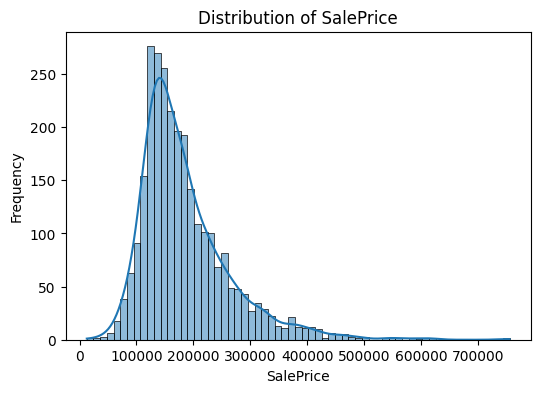

In [8]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

**SalePrice:** The target variable shows a right-skewed distribution, indicating that most houses are sold at lower prices, with a few high-priced houses.

Histograms for all numerical features:


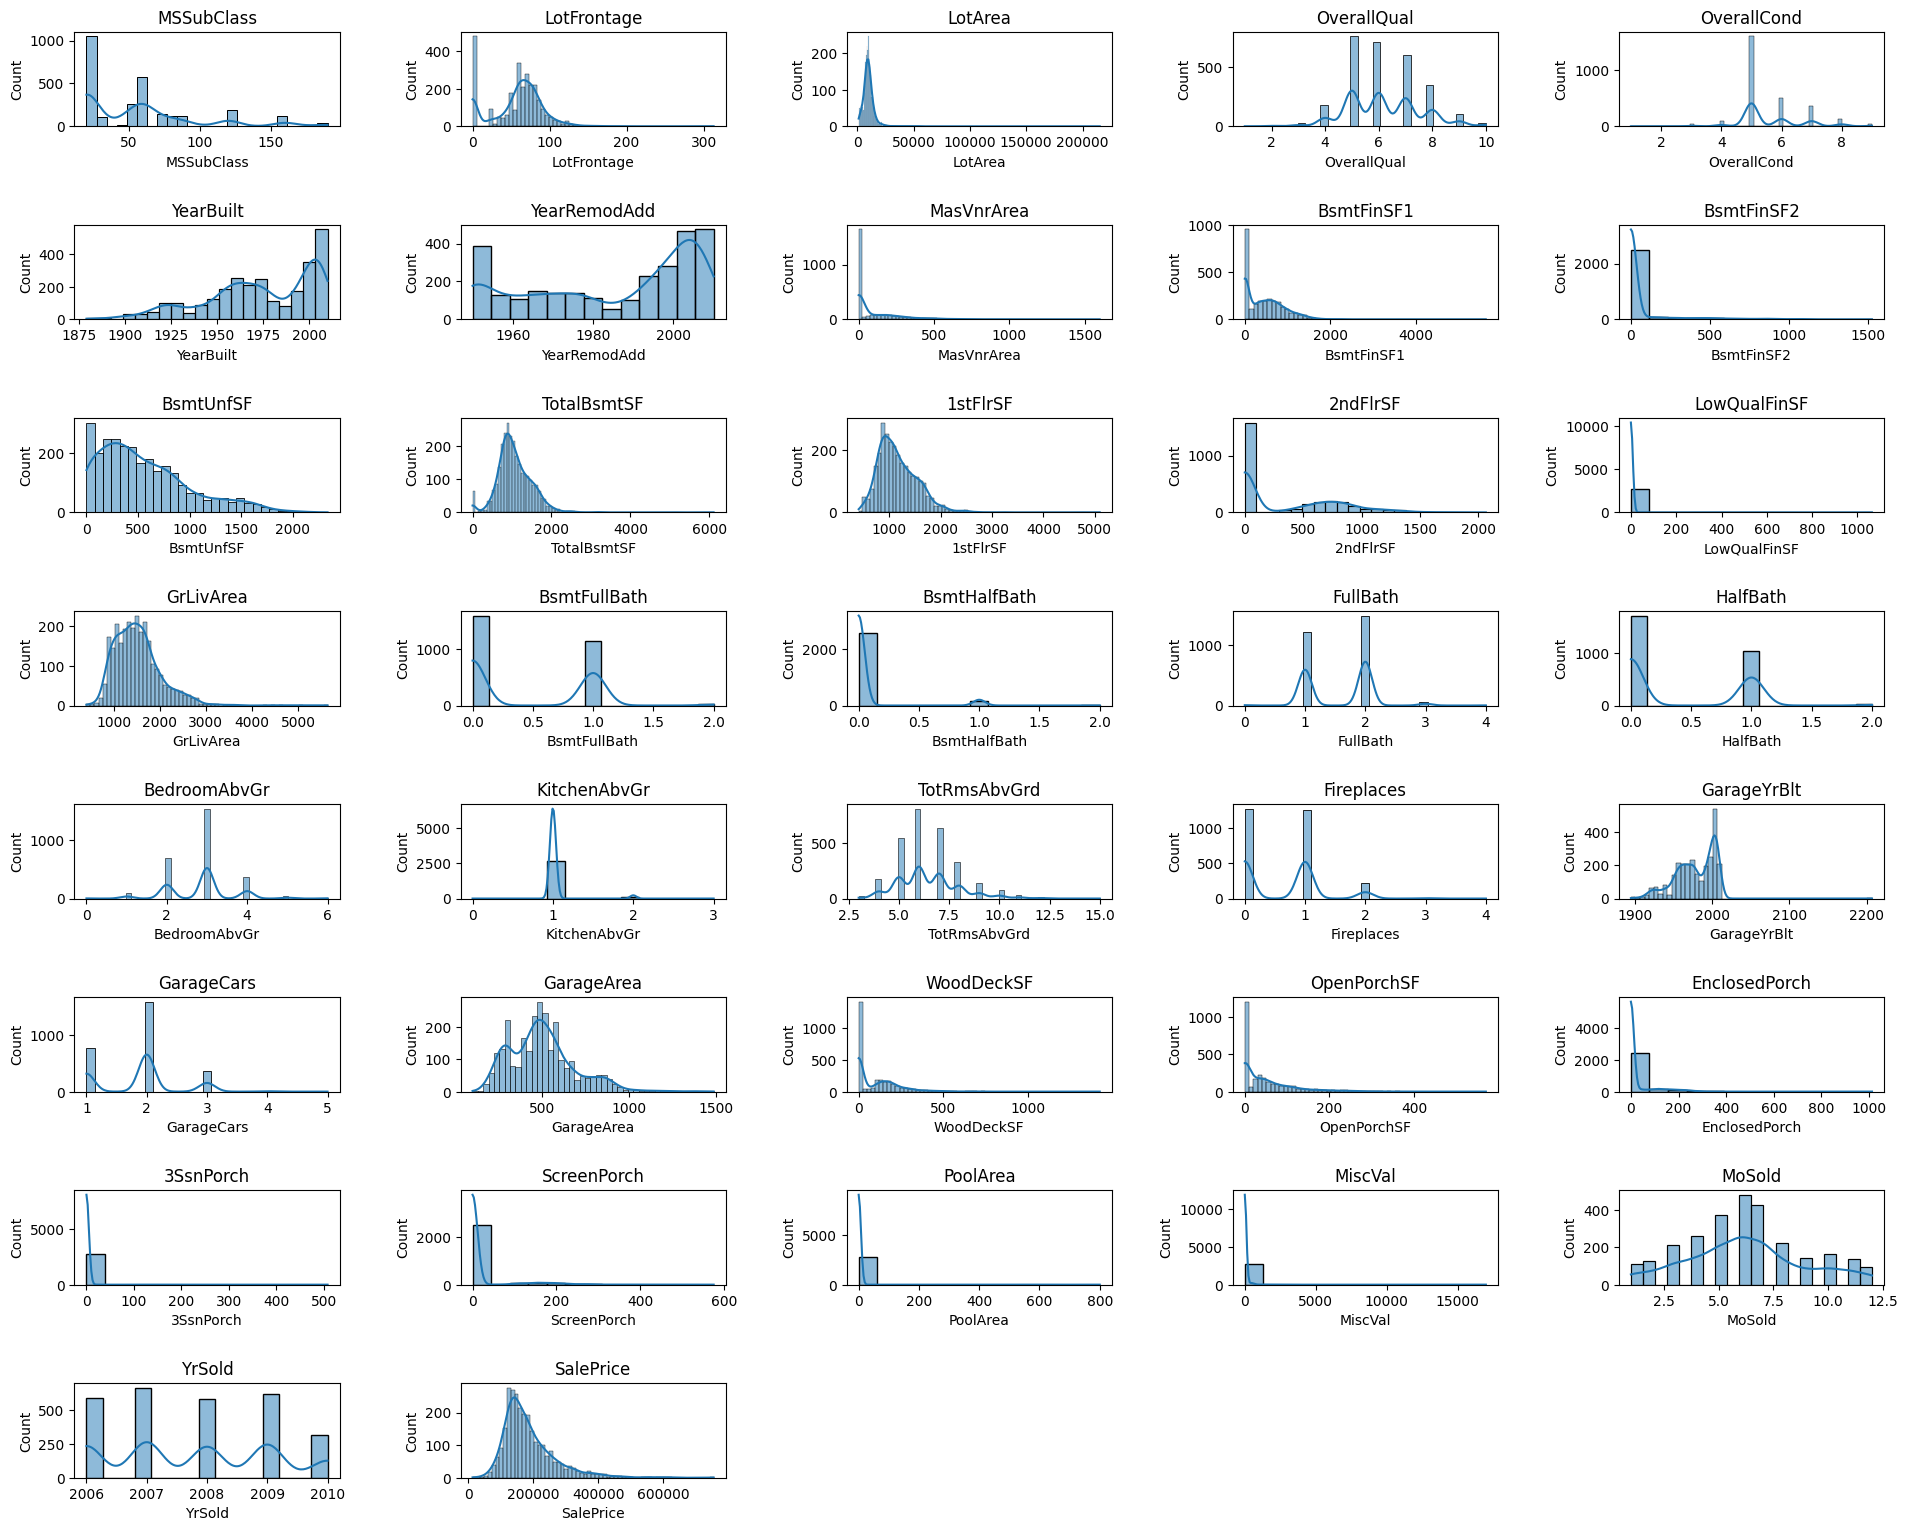

In [9]:
# Histograms for all numerical features
num_features = ames_df.select_dtypes(include=[np.number]).columns
num_features_count = len(num_features)

# Determine the grid size
rows = int(np.ceil(num_features_count / 4))
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.histplot(ames_df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

print("Histograms for all numerical features:")
plt.show()

### Interpretation of Histogram Results

The histograms for the numerical features of the Ames Housing dataset provide a visual representation of the distribution of each feature. Here are some key observations:

**1. MSSubClass:** The distribution is highly skewed to the right, with most values clustered at the lower end. This indicates that most houses belong to a few specific subclasses.

**2. LotFrontage, LotArea:** Both features show a right-skewed distribution, indicating that most properties have smaller lot frontages and areas, with a few properties having much larger values.

**3. OverallQual, OverallCond:** These features show a more normal distribution, particularly OverallQual, which peaks around the middle values, indicating that most houses have an average quality and condition.

**4. YearBuilt, YearRemodAdd:** Both features show a peak around recent years, indicating that there has been a higher rate of construction and remodeling in recent decades.

**5. MasVnrArea:** This feature shows many houses with no masonry veneer area (indicated by the high count at 0), with the remaining values right-skewed.

**6. Basement Features (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF):** The distributions are generally right-skewed, indicating that most houses have smaller basement areas, with a few having very large ones.

**7. 1stFlrSF, 2ndFlrSF (First and Second Floor Square Feet):** Both features show right-skewed distributions, indicating that most houses have smaller first and second floor areas.

**8. Bathrooms (FullBath, HalfBath, BsmtFullBath, BsmtHalfBath):** These features show discrete distributions with peaks at typical values, indicating that 
-   BsmtFullBath: Most houses have 0 or 1 full bathroom in the basement.
-   BsmtHalfBath: Most houses have 0 or 1 half bathroom in the basement, with very few having more.
-   FullBath: Most houses have 1 or 2 full bathrooms, with a smaller number having 3 or 4.
-   HalfBath: Most houses have 0 or 1 half bathroom, with a smaller number having 2.
    
These distributions are expected for bathroom features, as they are typically present in whole numbers and not fractions.

**9. GrLivArea:** The distribution is right-skewed, indicating that most houses have smaller living areas, with a few having very large ones.

**10. Bedrooms, Kitchens, Fireplaces:** These features show a more discrete distribution, with most houses having a typical number of bedrooms, kitchens, and fireplaces.

**11. Garage Features (GarageCars, GarageArea, GarageYrBlt):** These features generally show right-skewed distributions, indicating that most houses have smaller garage areas and capacities, with a few having very large ones.

**12. Porch and Deck Features (WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch):** These features show right-skewed distributions, indicating that most houses have smaller porch and deck areas.

**13. PoolArea, MiscVal:** These features show very high counts at 0, indicating that most houses do not have pools or miscellaneous values.

**14. MoSold:** This feature shows a more normal distribution, indicating that house sales are relatively evenly distributed across months.

**15. YrSold:** This feature shows an almost uniform distribution across the years, with the exception of a shorter bar in 2010, indicating fewer sales in that year.

**16. SalePrice:** The target variable shows a right-skewed distribution, indicating that most houses are sold at lower prices, with a few high-priced houses.

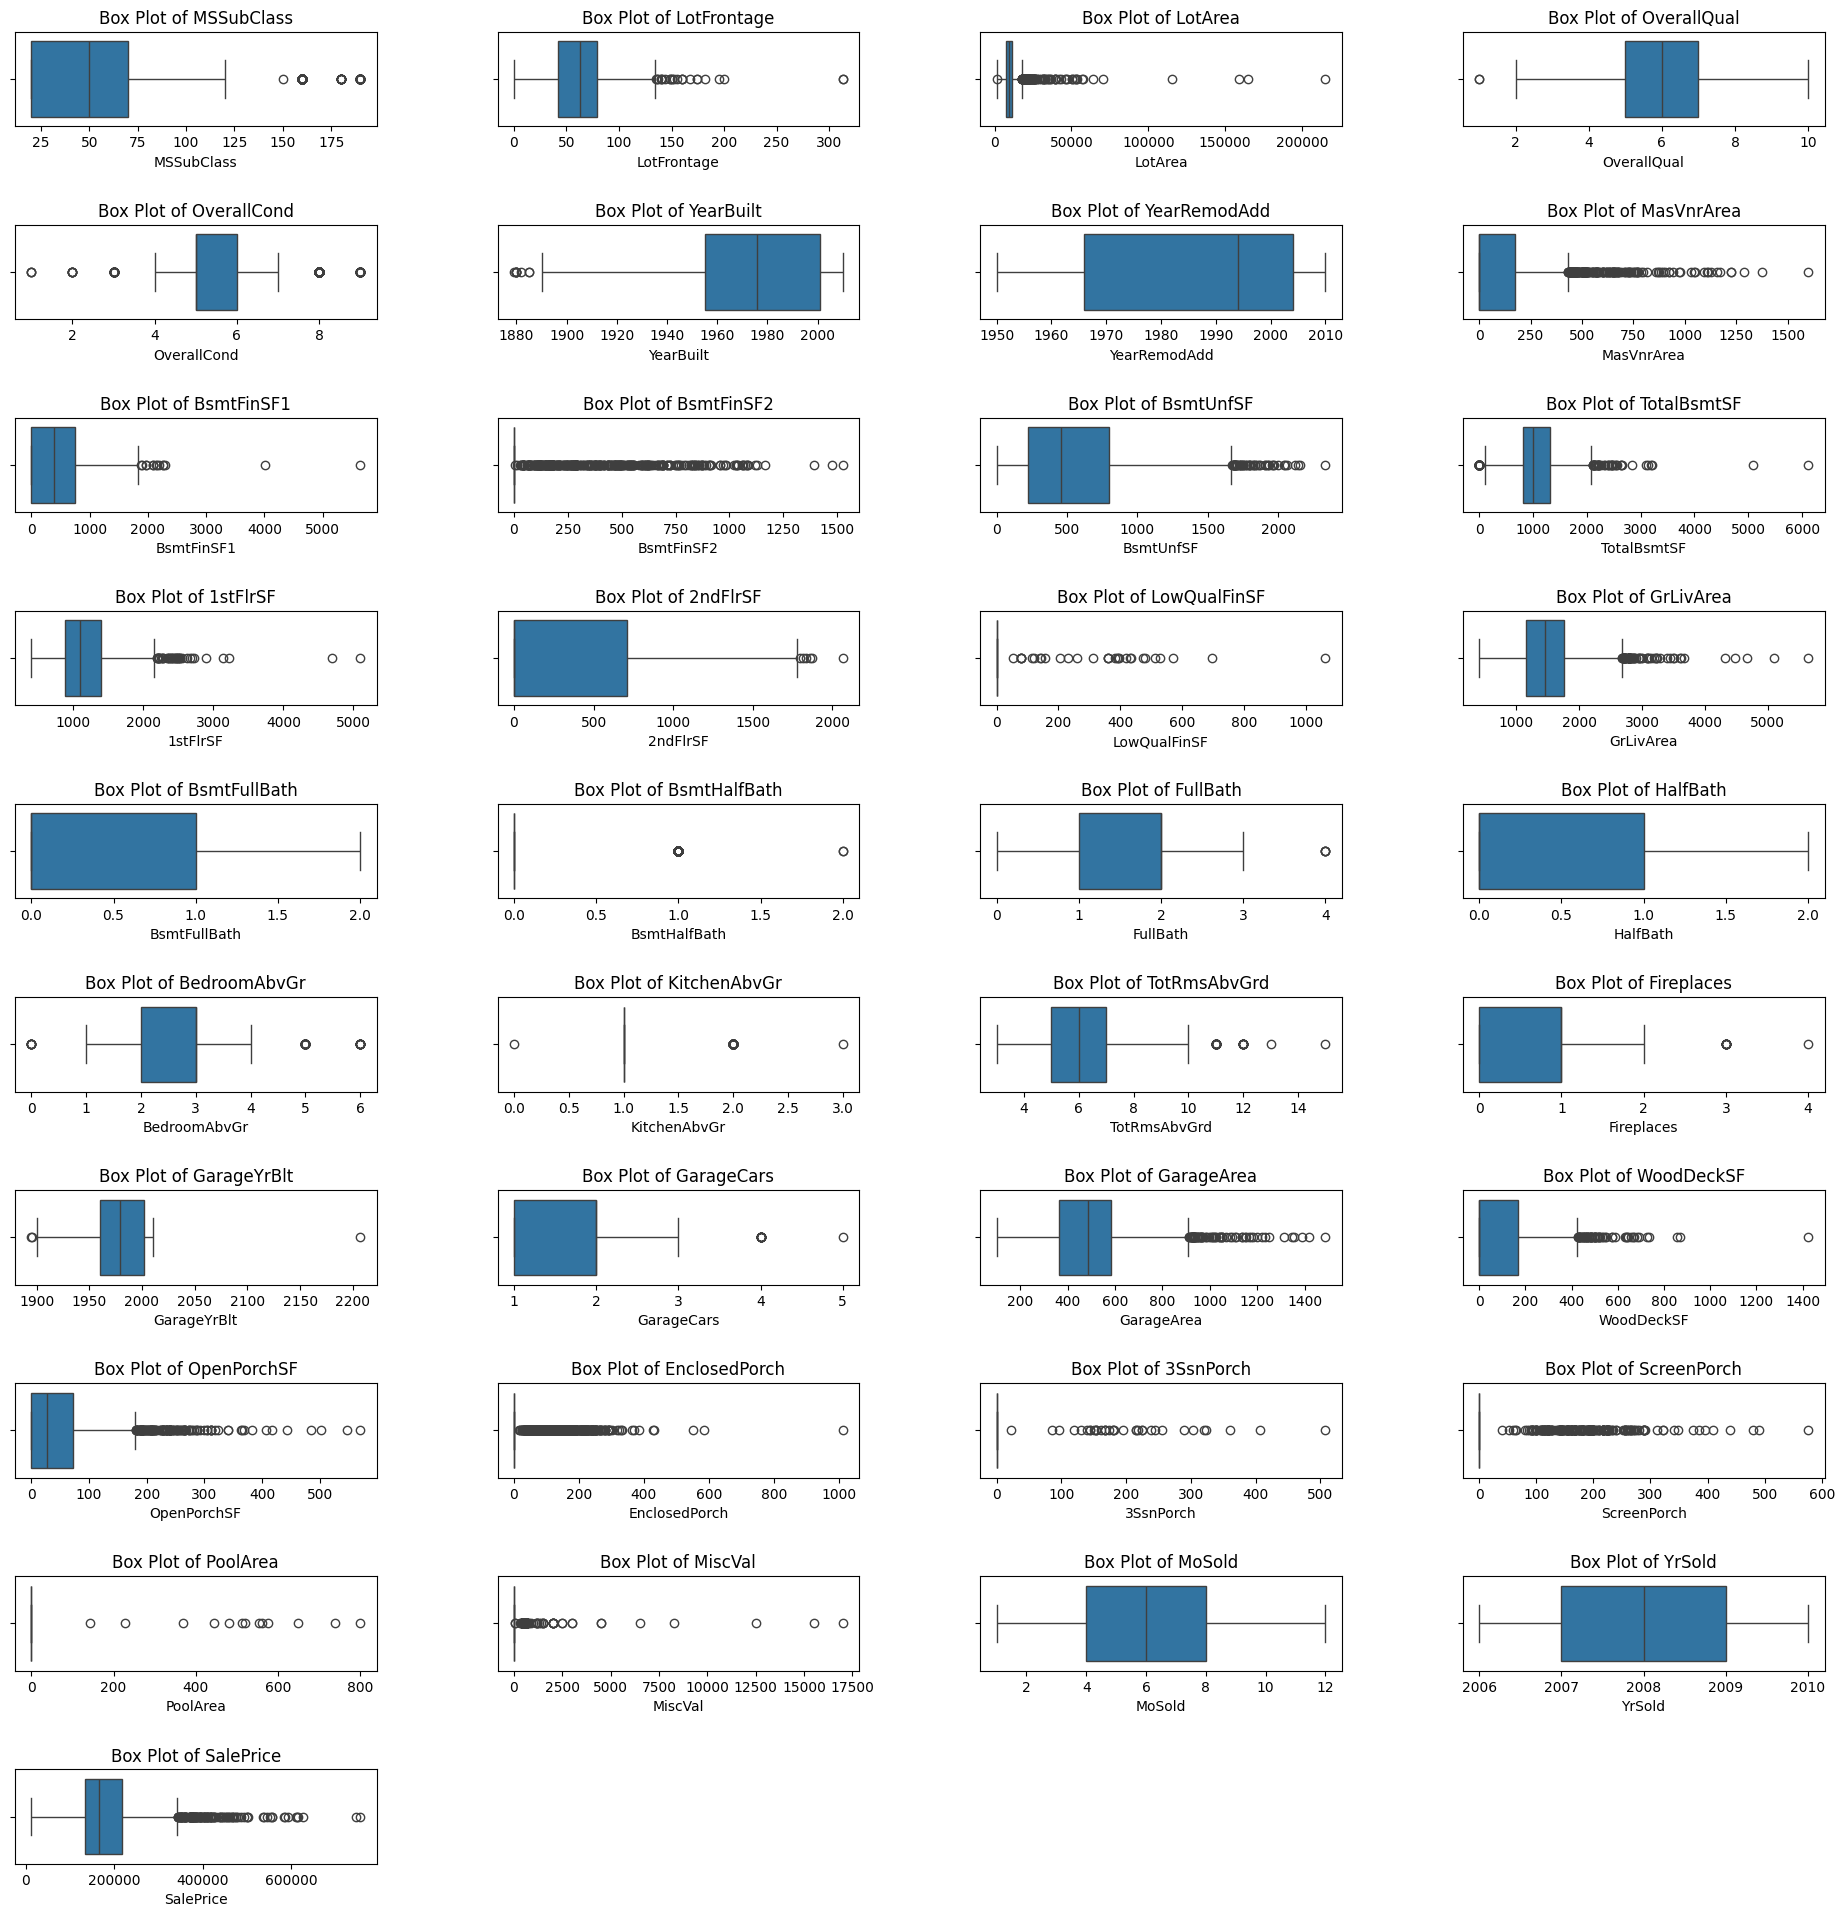

In [10]:
# Box Plots for all numerical features
num_features = ames_df.select_dtypes(include=[np.number]).columns

# Determine the grid size
rows = int(np.ceil(len(num_features) / 4))
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.boxplot(x=ames_df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature}')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

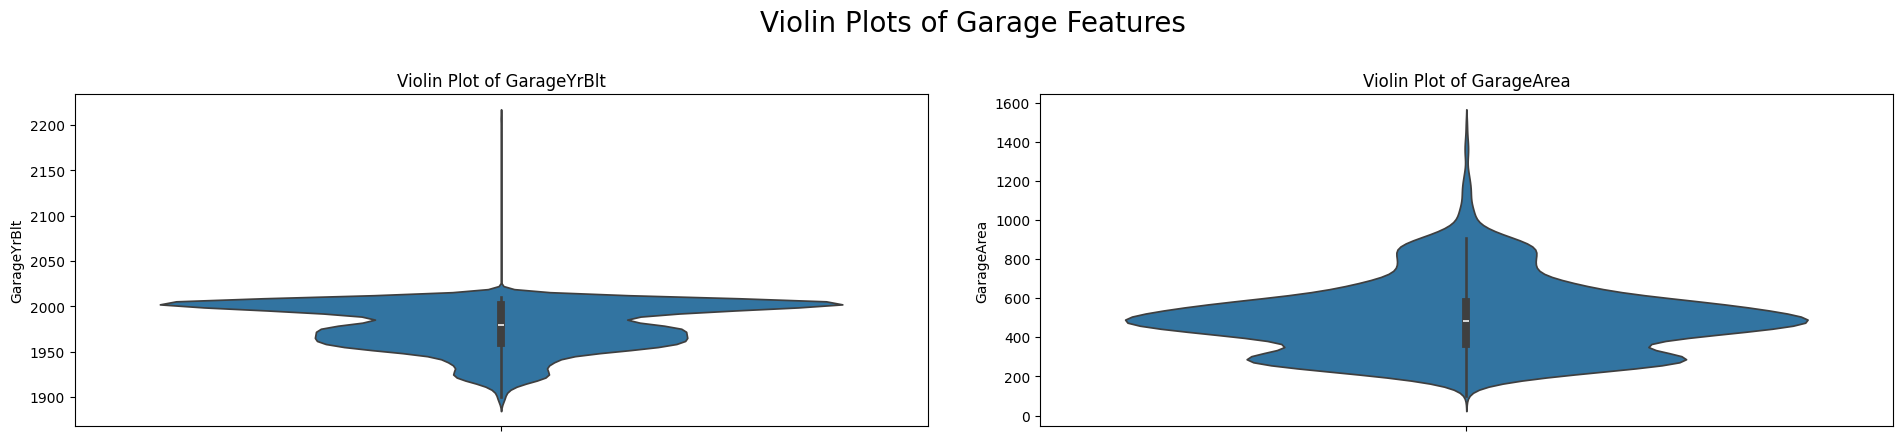

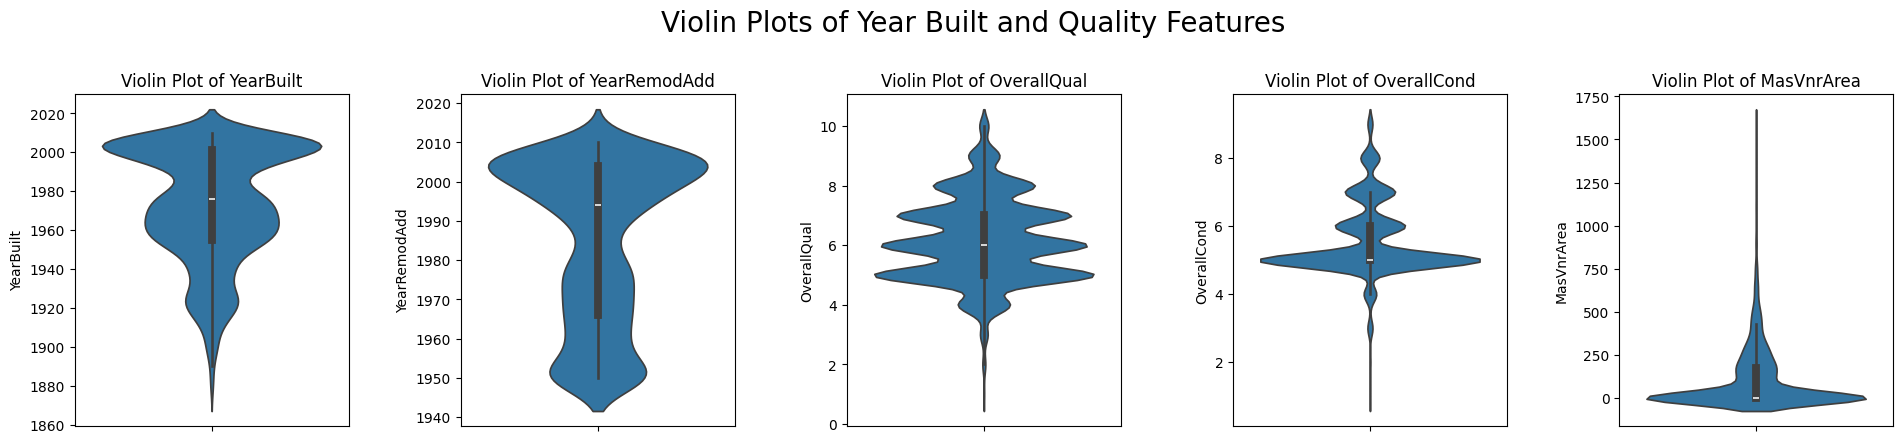

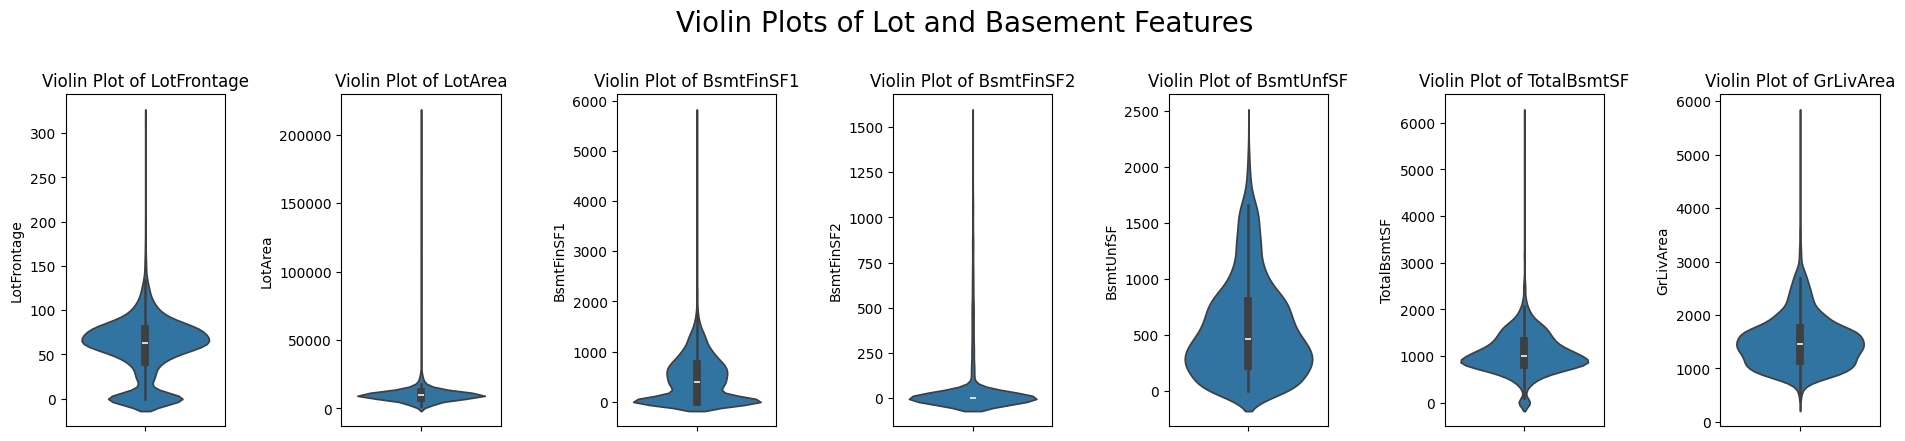

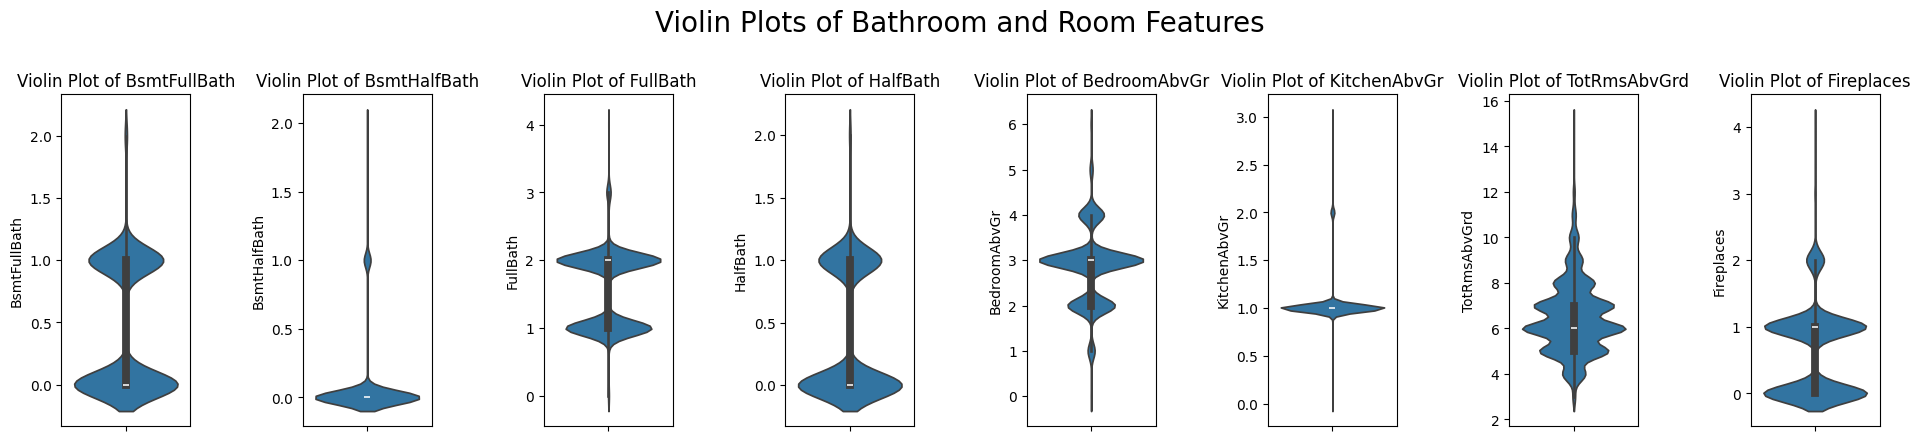

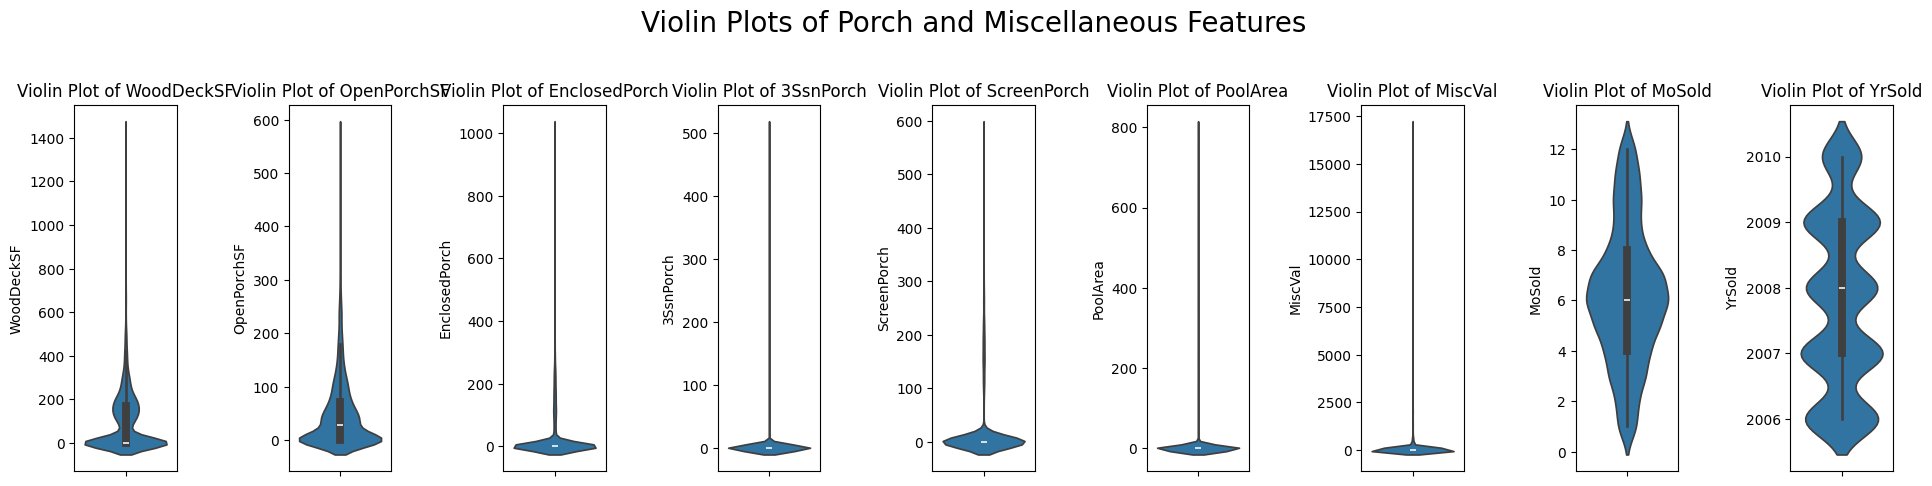

In [11]:
# Function to create violin plots for a group of features
def plot_violin_group(features, title):
    num_features = len(features)
    rows = int(np.ceil(num_features / 8))
    cols = min(9, num_features)

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
    fig.tight_layout(pad=5.0)

    # If only one row or column, axes might not be a 2D array, so we need to handle that case
    if rows == 1:
        axes = np.expand_dims(axes, axis=0)
    if cols == 1:
        axes = np.expand_dims(axes, axis=1)

    for i, feature in enumerate(features):
        row = i // cols
        col = i % cols
        sns.violinplot(y=ames_df[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Violin Plot of {feature}')

    # Remove any empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.show()

# Plot each group
plot_violin_group(['GarageYrBlt', 'GarageArea'], 'Violin Plots of Garage Features')
plot_violin_group(['YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'MasVnrArea'], 'Violin Plots of Year Built and Quality Features')
plot_violin_group(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea'], 'Violin Plots of Lot and Basement Features')
plot_violin_group(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], 'Violin Plots of Bathroom and Room Features')
plot_violin_group(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], 'Violin Plots of Porch and Miscellaneous Features')

### Lot and Basement Features
1.	LotFrontage: Shows a high density of values around 50, with some higher values up to 300.
2.	LotArea: Highly skewed with most values between 0 and 50,000, and a few much higher.
3.	BsmtFinSF1: Most values are below 2,000, with a high peak near zero.
4.	BsmtFinSF2: Similar to BsmtFinSF1 but with fewer values and a peak near zero.
5.	BsmtUnfSF: Dense around 0 to 1,500, with some values up to 2,500.
6.	TotalBsmtSF: Concentration of values around 0 to 2,000, with some higher values.
7.	GrLivArea: Dense around 1,000 to 2,500, with fewer values above 3,000.

### Year Built and Quality Features

1.	YearBuilt: Most houses were built between 1950 and 2000.
2.	YearRemodAdd: Similar to YearBuilt but with a peak around 2000.
3.	OverallQual: Most houses have a quality rating between 5 and 7.
4.	OverallCond: Most houses have a condition rating between 5 and 7.
5.	MasVnrArea: High density near zero, indicating many houses do not have masonry veneer.

### Bathroom and Room Features

1.	BsmtFullBath: Most houses have 0 or 1 full bathroom in the basement.
2.	BsmtHalfBath: Most houses have 0 half bathrooms in the basement.
3.	FullBath: Most houses have 2 full bathrooms.
4.	HalfBath: Most houses have 0 or 1 half bathroom.
5.	BedroomAbvGr: Most houses have 2 to 3 bedrooms.
6.	KitchenAbvGr: Most houses have 1 kitchen.
7.	TotRmsAbvGrd: Most houses have 5 to 8 rooms above ground.
8.	Fireplaces: Most houses have 1 fireplace.

### Garage Features

1.	GarageYrBlt: Most garages were built between 1960 and 2000.
2.	GarageArea: Most garages have an area between 0 and 600.
3.	GarageCars: Most houses have 1 or 2 car garages.

### Porch and Miscellaneous Features
1.	WoodDeckSF: Most houses have a wood deck area around 0 to 200.
2.	OpenPorchSF: Most houses have open porch areas around 0 to 100.
3.	EnclosedPorch: Most houses have enclosed porch areas around 0.
4.	3SsnPorch: Very few houses have a 3-season porch.
5.	ScreenPorch: Most houses have screen porch areas around 0.
6.	PoolArea: Very few houses have a pool.
7.	MiscVal: Most houses have a miscellaneous value around 0.
8.	MoSold: Sales are distributed fairly evenly across months.
9.	YrSold: Most houses were sold between 2006 and 2010.


**3. Bi-variate Analysis**

Explore the relationships between pairs of variables.

- Correlation Heatmap: Identify strong relationships between features and the target variable.
- Scatter Plots: Visualize the relationships between selected features and SalePrice.

Scatter plots for all numerical features vs. SalePrice:


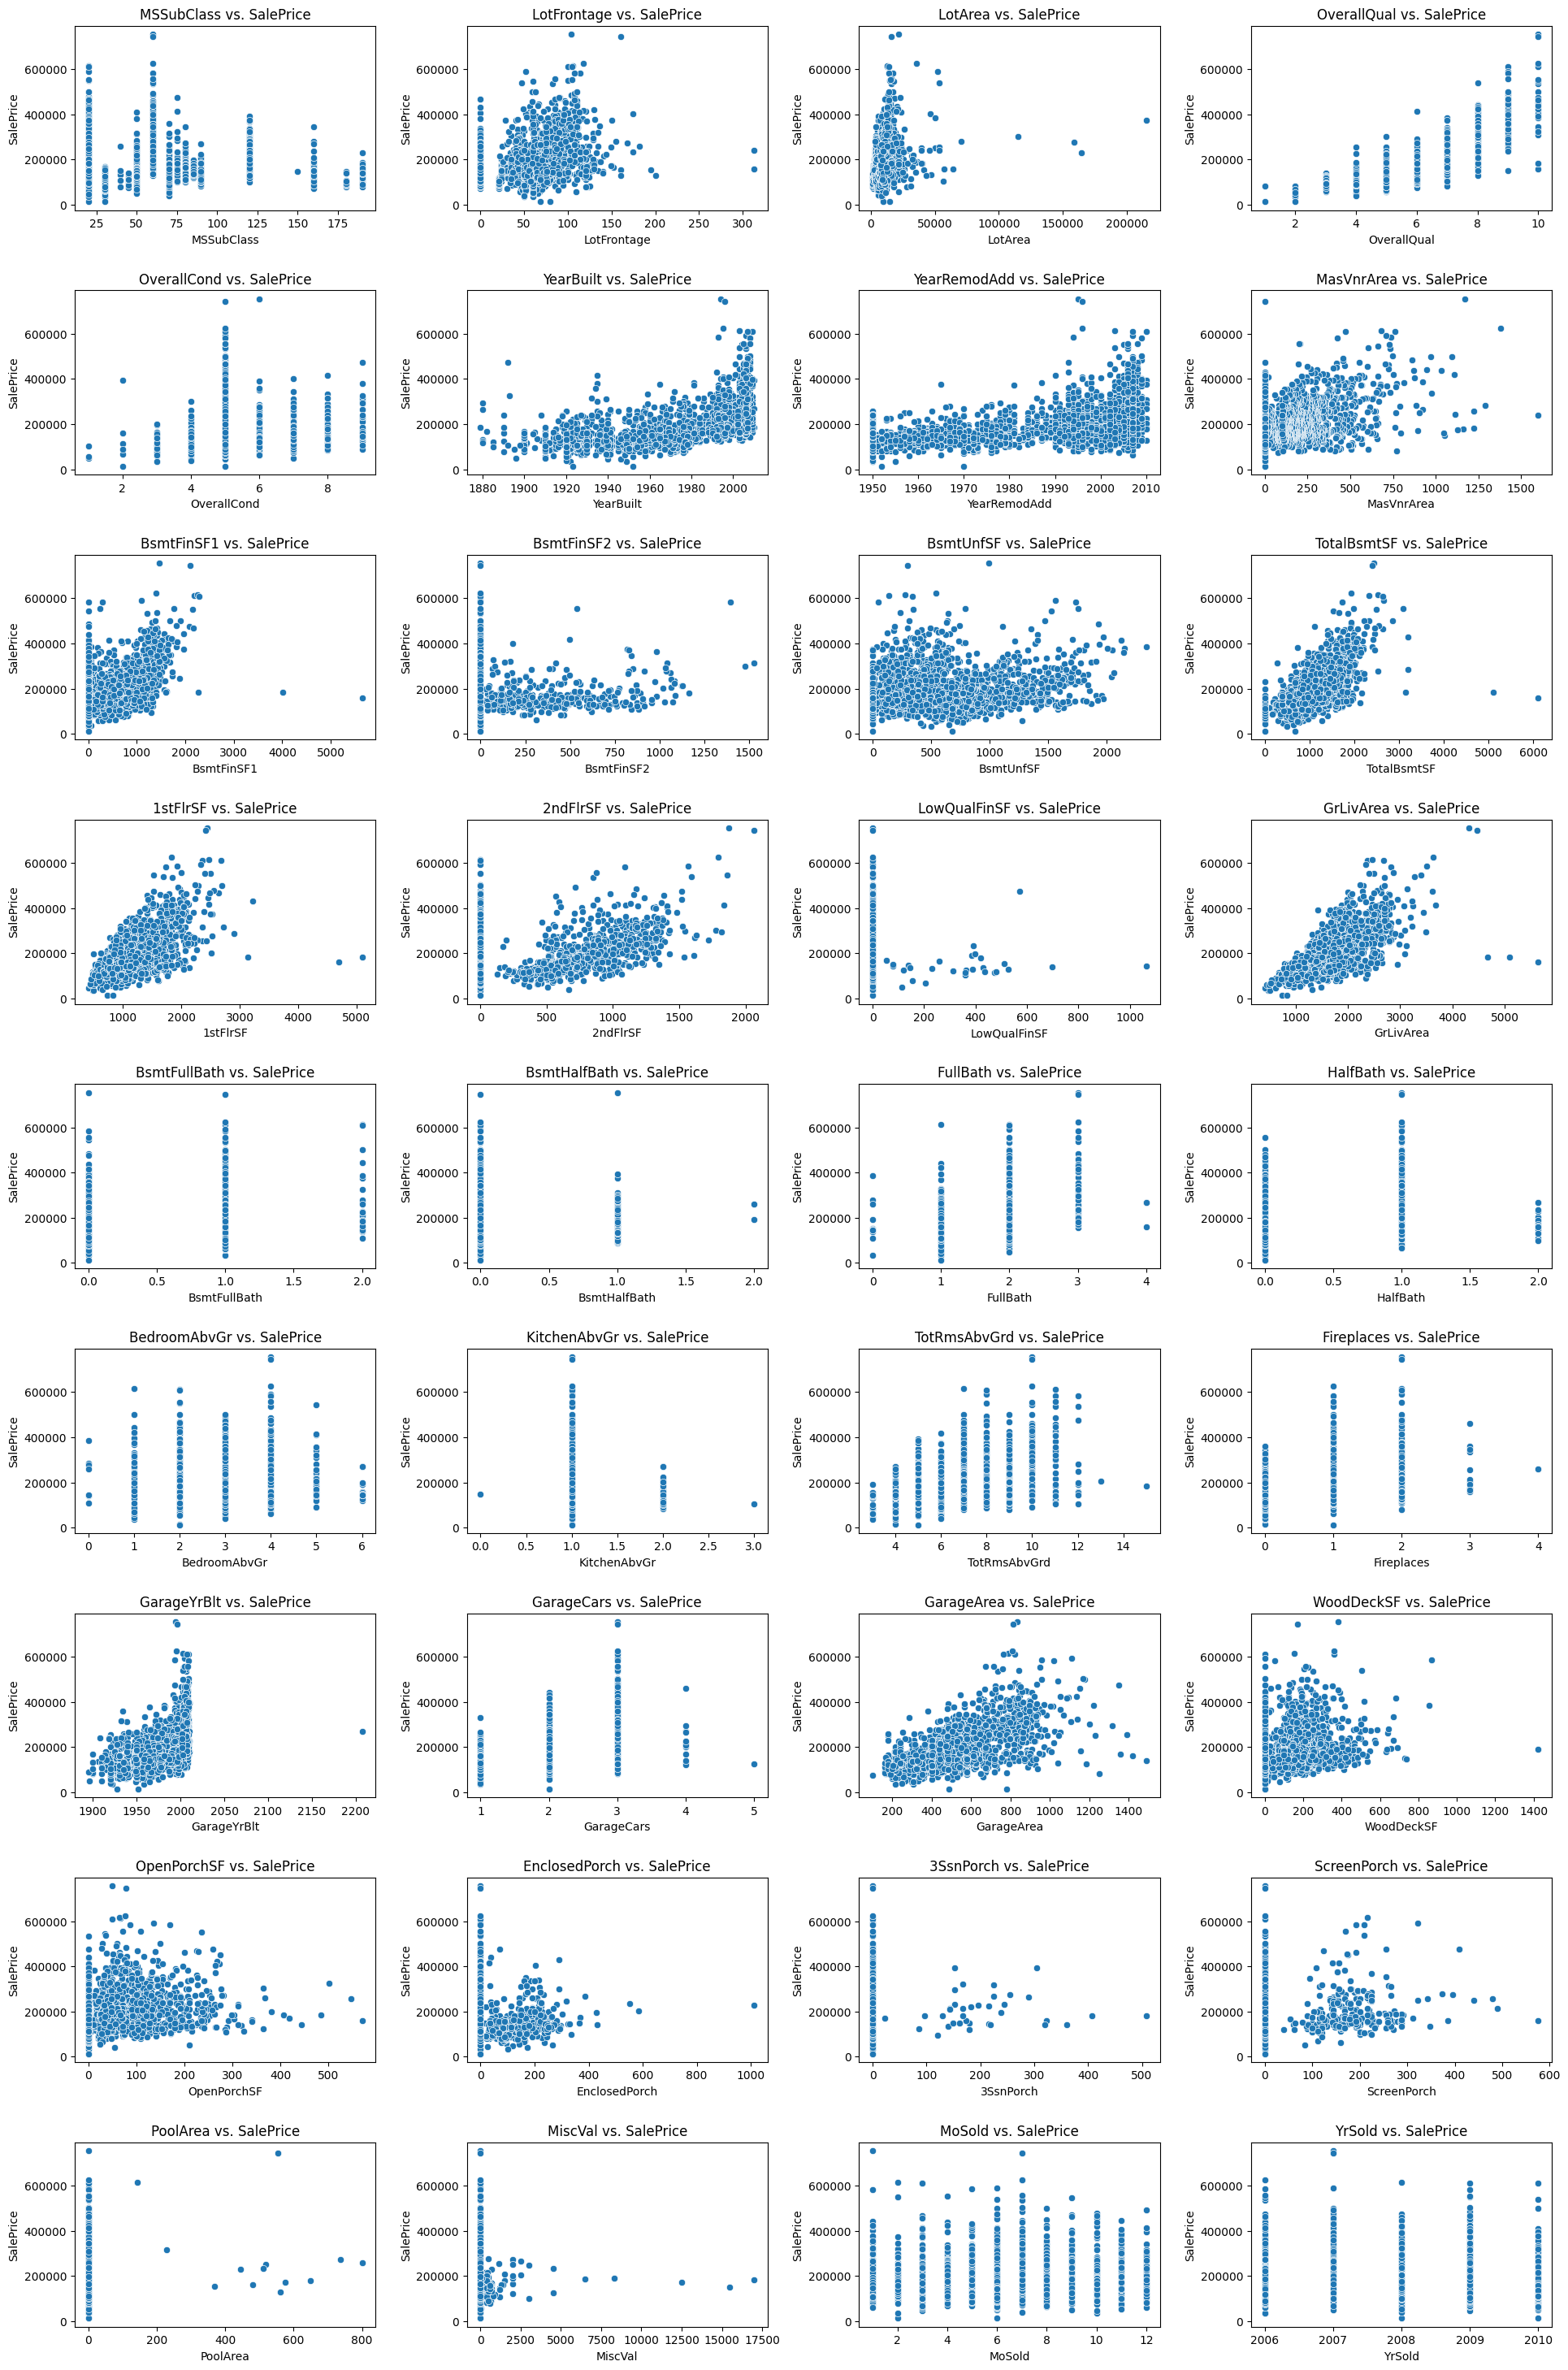

In [12]:
# Scatter plots for all numerical features against SalePrice
num_features = ames_df.select_dtypes(include=[np.number]).columns.drop('SalePrice')
num_features_count = len(num_features)

# Determine the grid size
rows = int(np.ceil(num_features_count / 4))
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.scatterplot(x=ames_df[feature], y=ames_df['SalePrice'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. SalePrice')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('SalePrice')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

print("Scatter plots for all numerical features vs. SalePrice:")
plt.show()


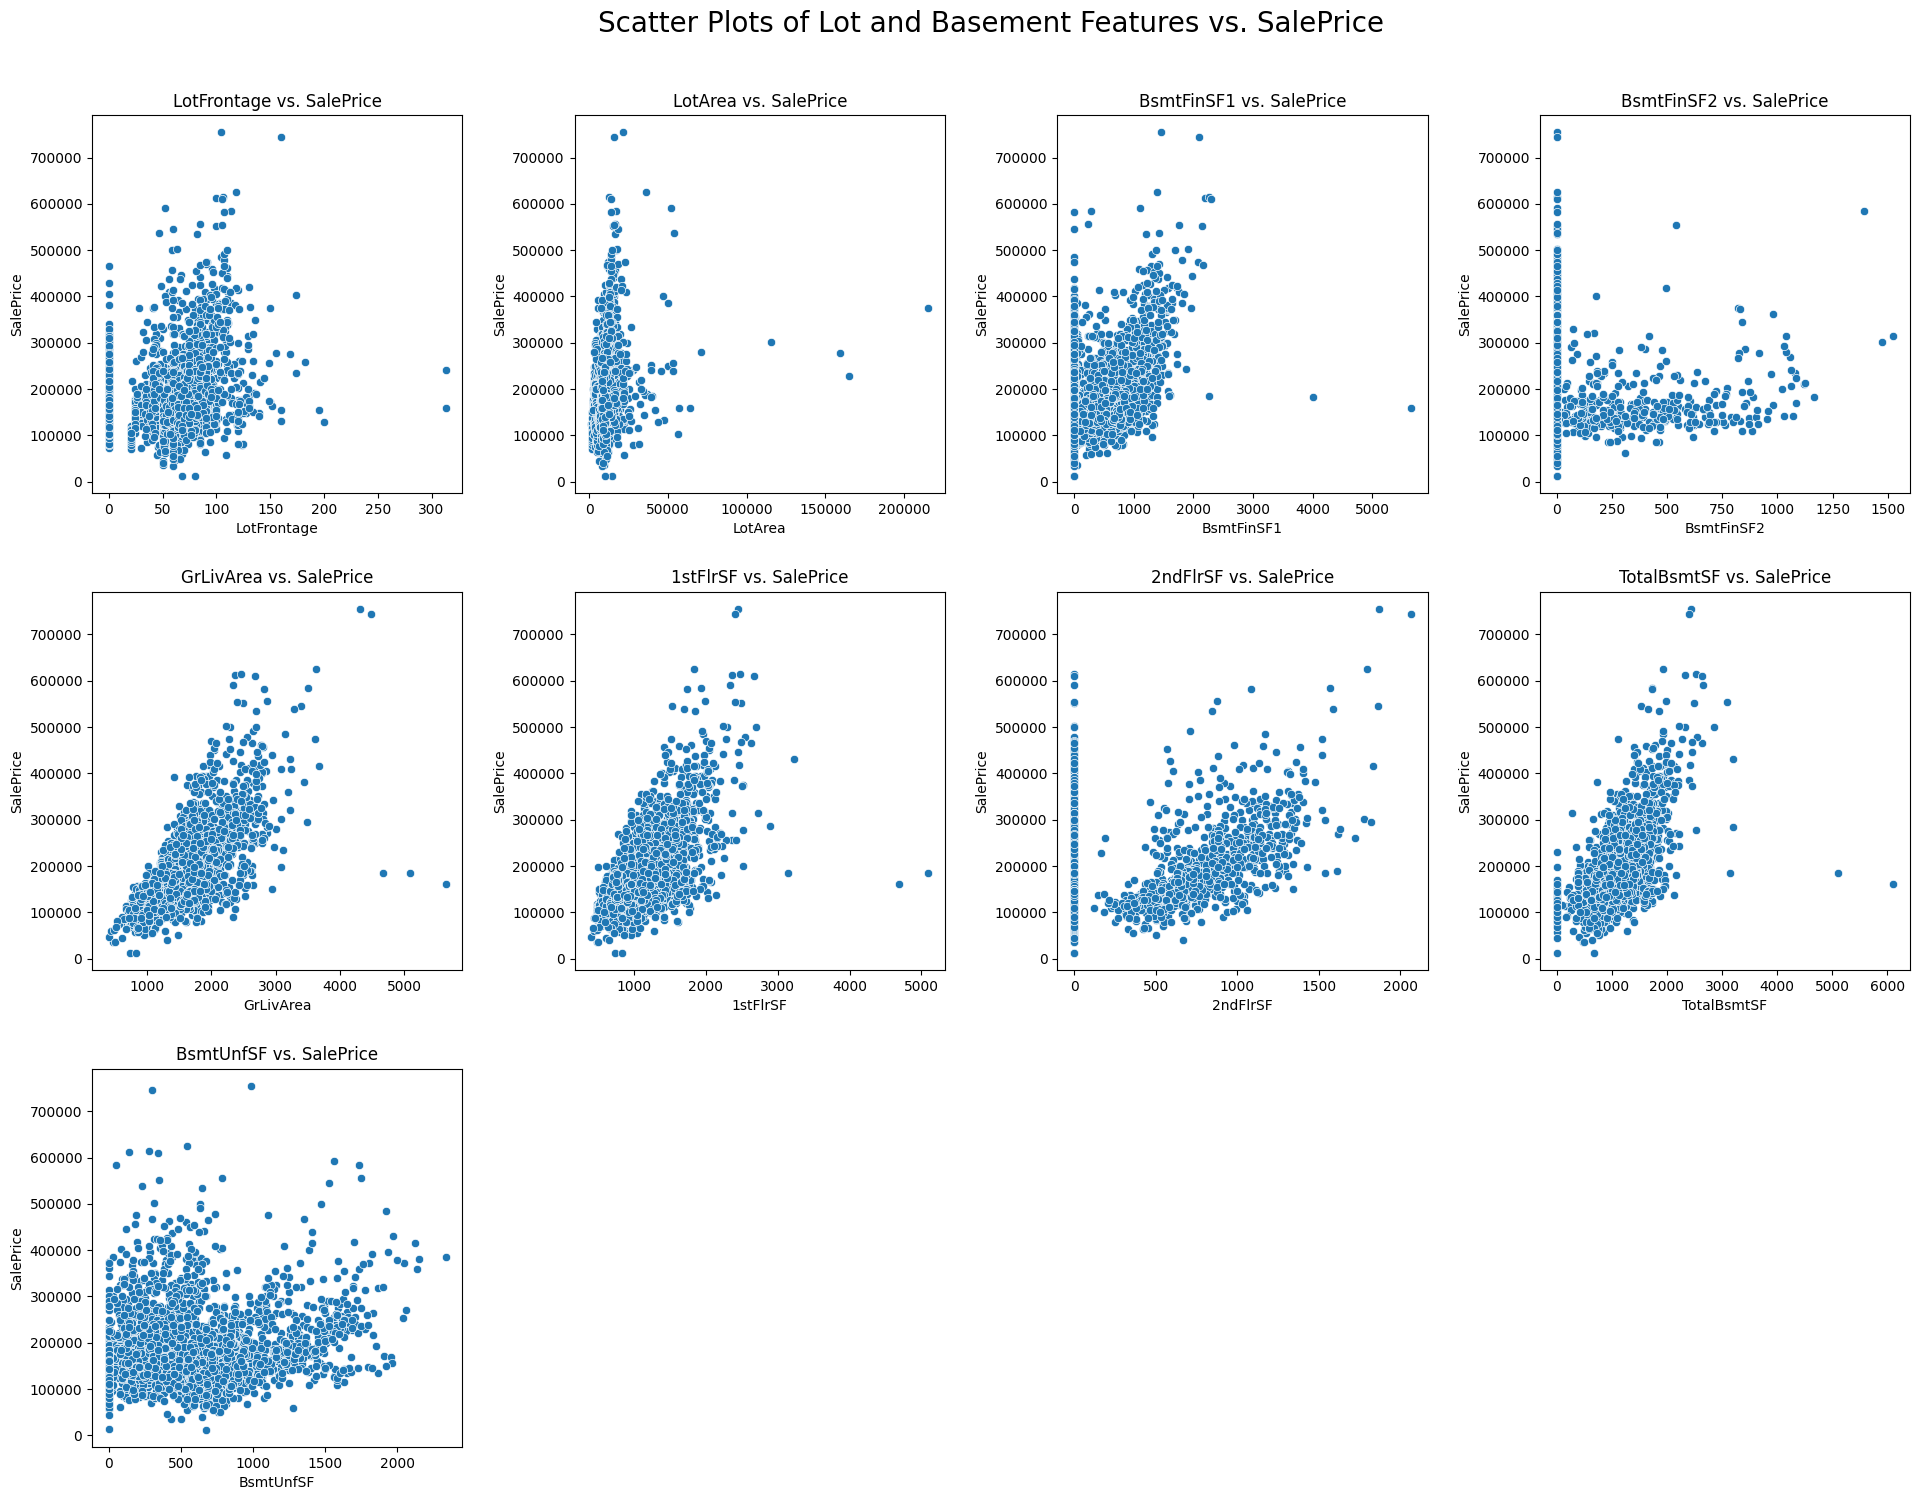

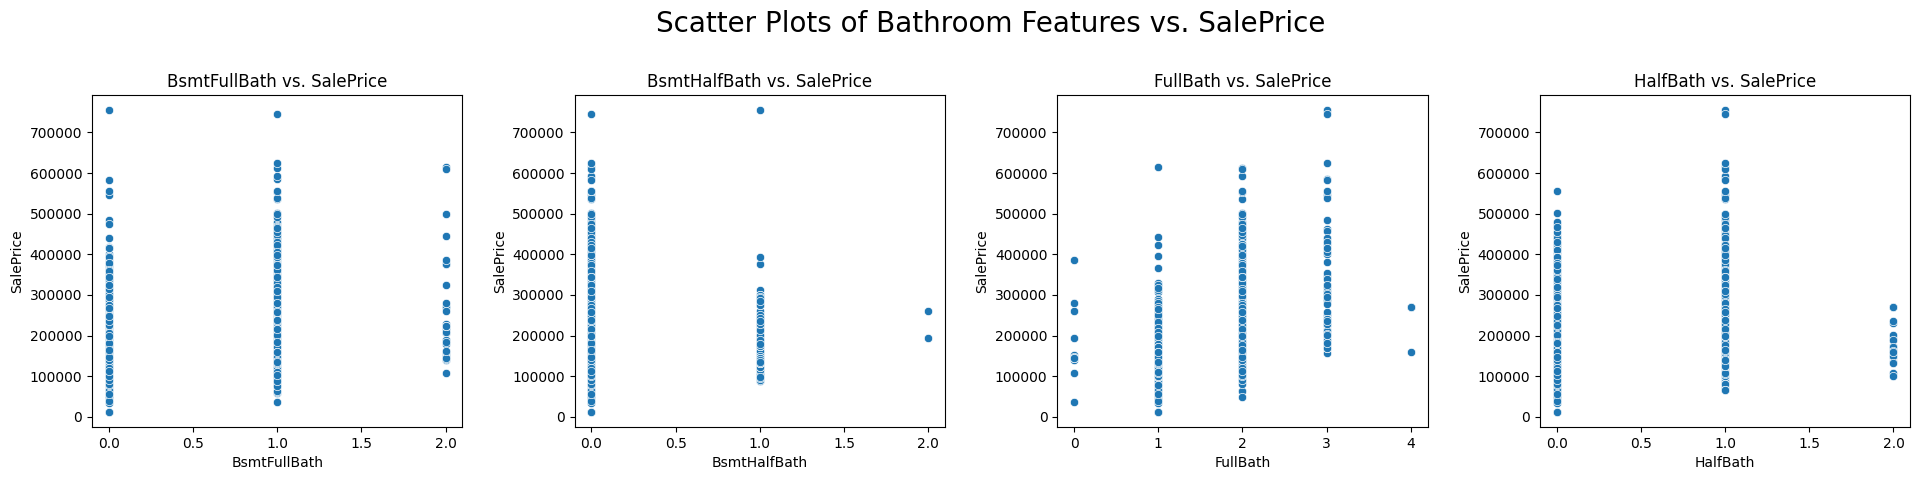

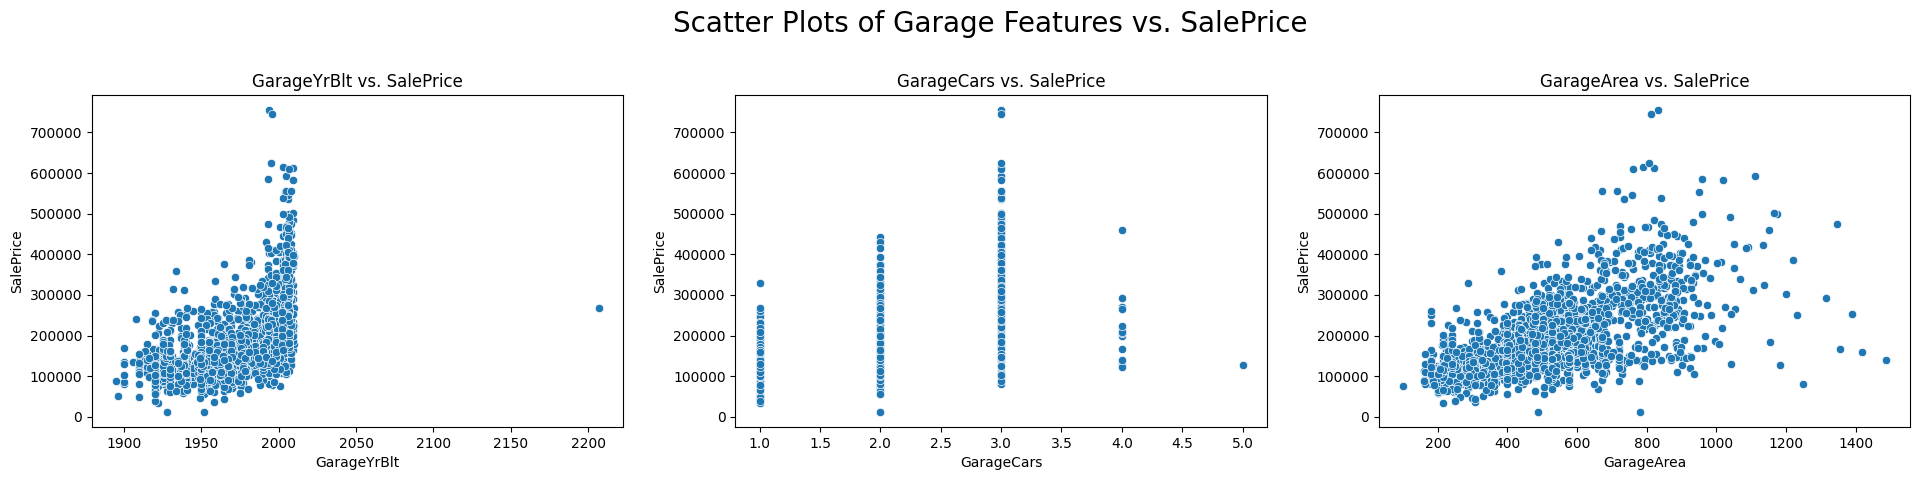

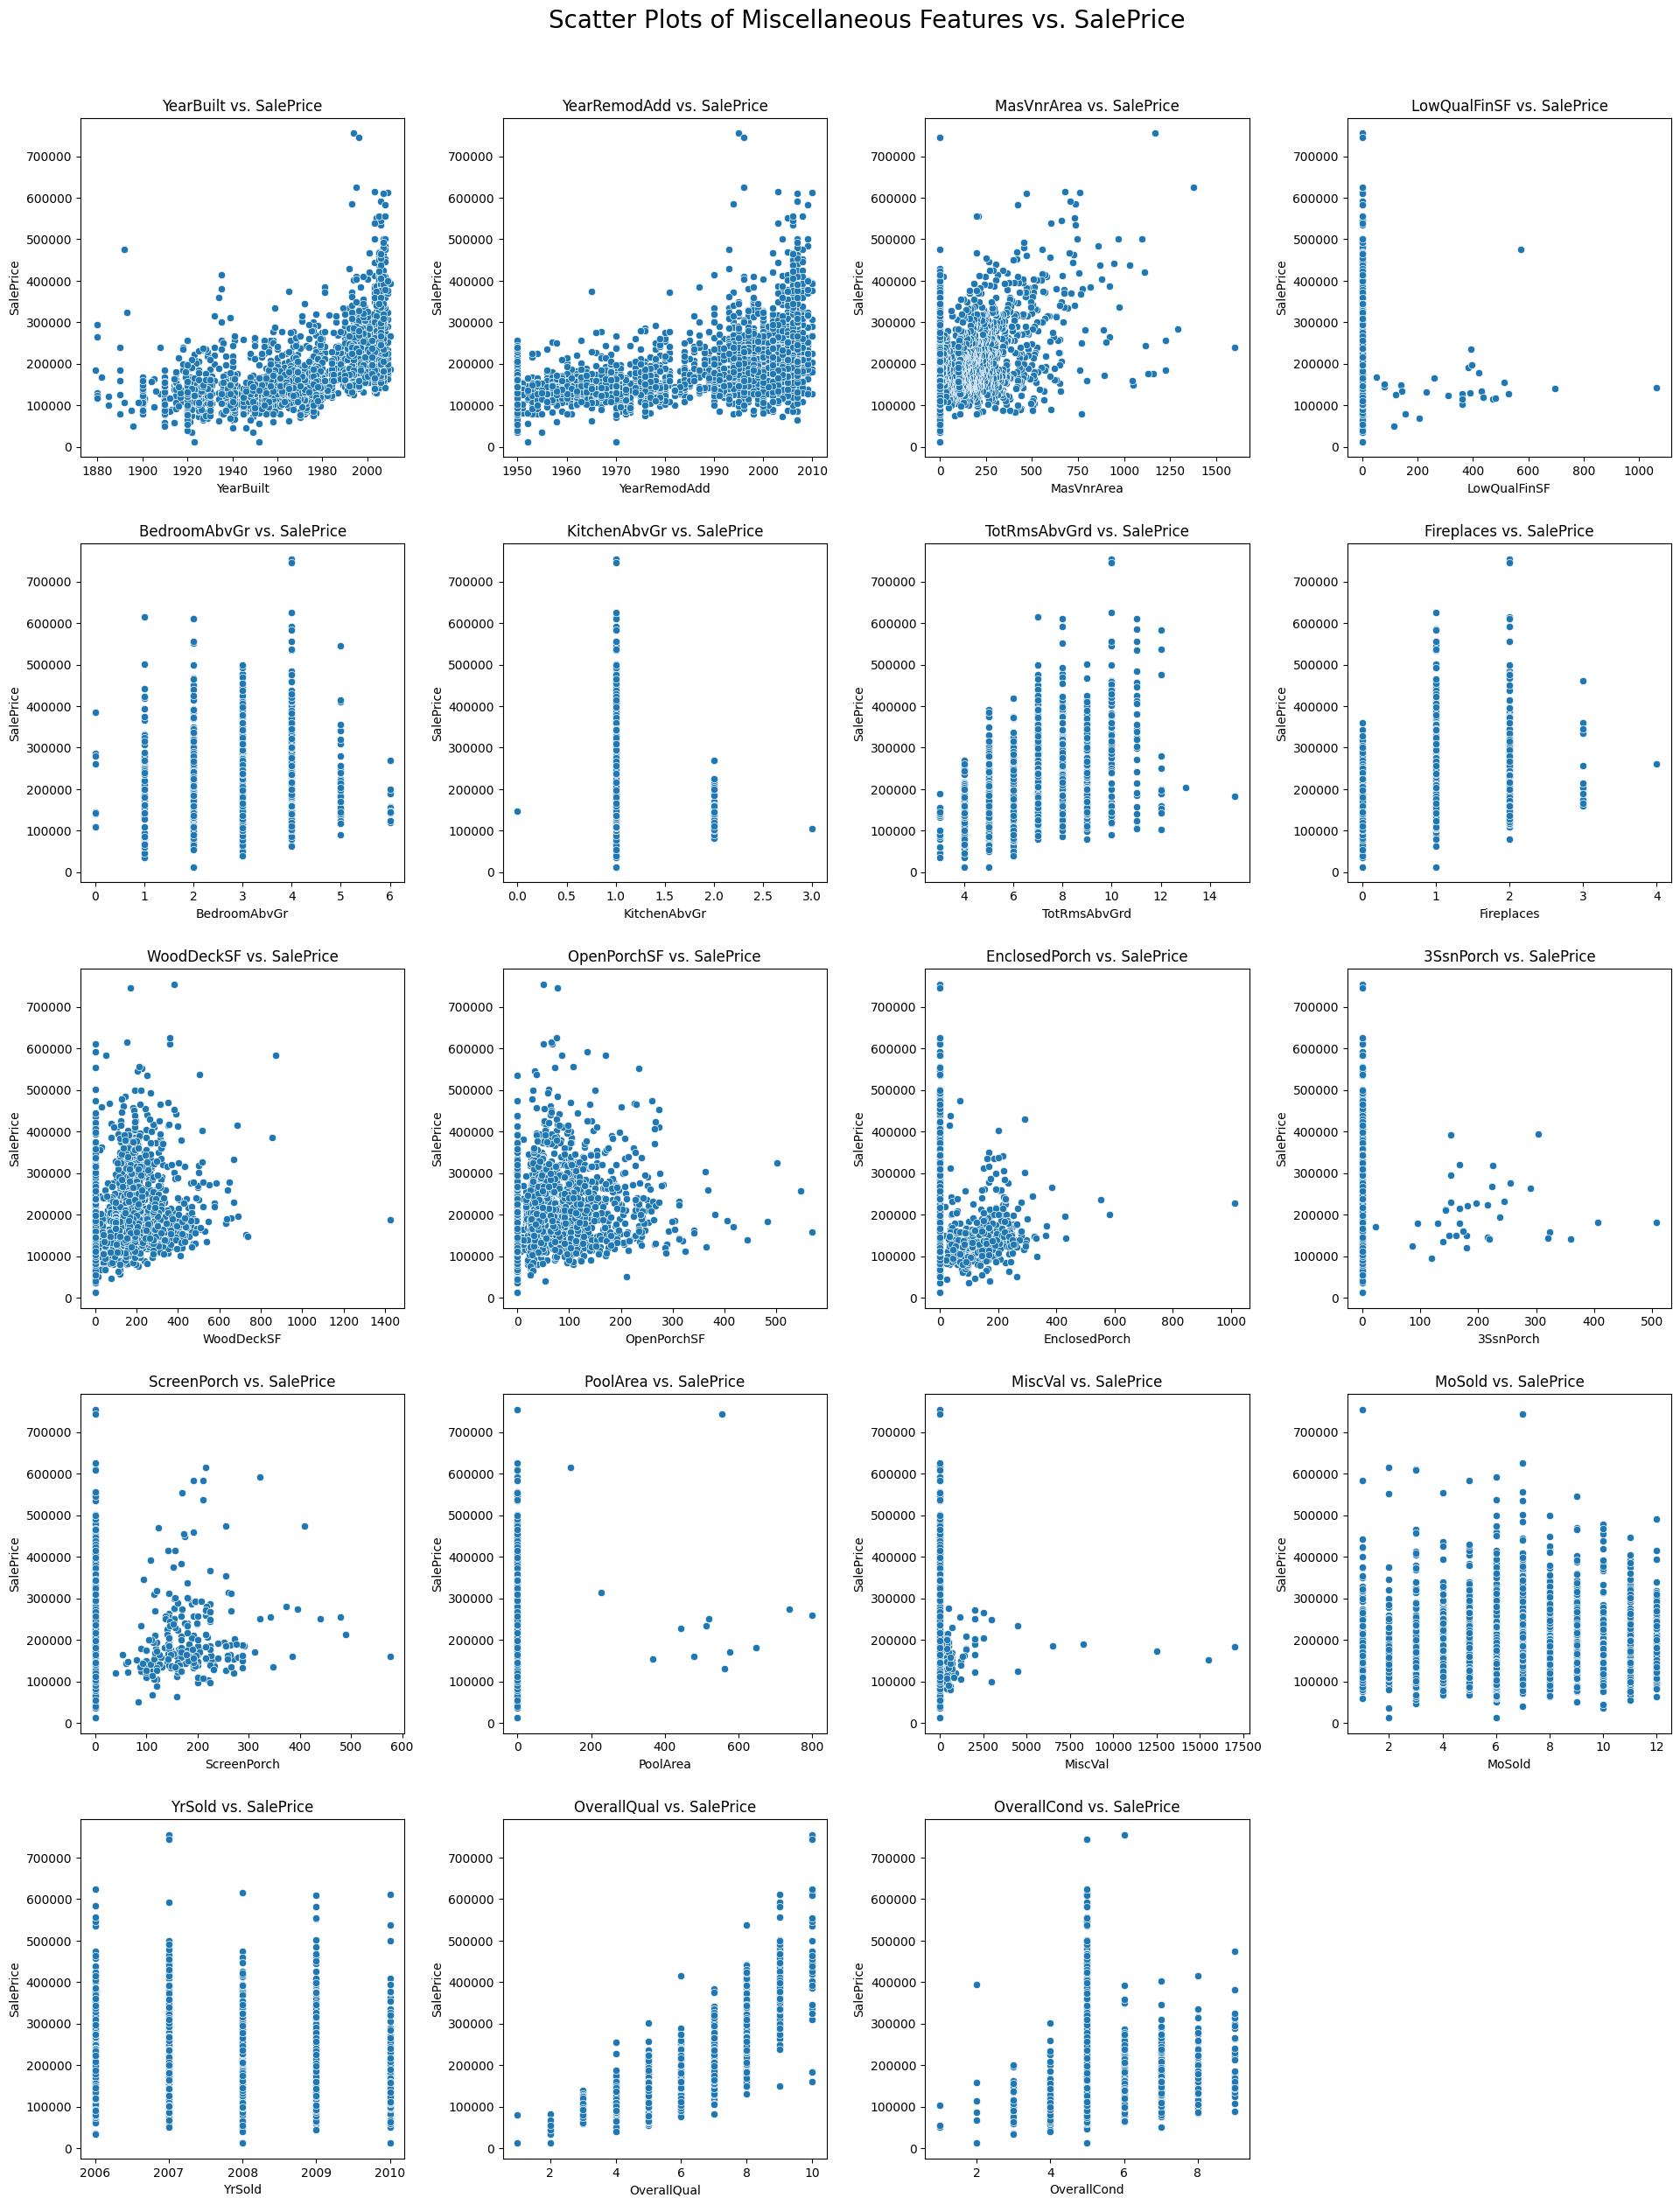

In [13]:
# Define groups of features, ensuring all numerical features are included
group1 = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF']
group2 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
group3 = ['GarageYrBlt', 'GarageCars', 'GarageArea']
group4 = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
          'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']

# Function to plot scatter plots in a grid
def plot_scatter_group(features, title):
    num_features = len(features)
    rows = int(np.ceil(num_features / 4))
    cols = min(4, num_features)  # Ensure the number of columns doesn't exceed the number of features

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), squeeze=False)
    fig.tight_layout(pad=5.0)
    
    for i, feature in enumerate(features):
        row = i // cols
        col = i % cols
        sns.scatterplot(x=ames_df[feature], y=ames_df['SalePrice'], ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs. SalePrice')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('SalePrice')

    # Remove any empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.show()

# Plot each group
plot_scatter_group(group1, 'Scatter Plots of Lot and Basement Features vs. SalePrice')
plot_scatter_group(group2, 'Scatter Plots of Bathroom Features vs. SalePrice')
plot_scatter_group(group3, 'Scatter Plots of Garage Features vs. SalePrice')
plot_scatter_group(group4, 'Scatter Plots of Miscellaneous Features vs. SalePrice')


Interpretation of Scatter Plot Results
The scatter plots to visualize the relationships between each numerical feature and the target variable SalePrice. Here are some of our observations:

1.	MSSubClass vs. SalePrice:
	No clear relationship is observed. This suggests that the house subclass (building class) may not have a strong linear correlation with SalePrice.
    
2.	LotFrontage vs. SalePrice:
	The slight positive trend is consistent. Properties with larger frontages tend to have higher sale prices, but there is considerable variability.

3.	LotArea vs. SalePrice:
	The weak positive correlation is evident. Larger lots can sell for higher prices, but other factors also play significant roles.

4.	OverallQual vs. SalePrice:
	Strong positive correlation, indicating that higher overall quality ratings are associated with higher sale prices.

5.	OverallCond vs. SalePrice:
	Weak positive trend with variability, indicating that overall condition has a lesser impact on SalePrice compared to overall quality. They may be twin-brothers. 

6.	YearBuilt vs. SalePrice:
	Positive trend, indicating that newer homes tend to have higher sale prices.

7.	YearRemodAdd vs. SalePrice:
	Positive trend, similar to YearBuilt, indicating that recently remodeled homes tend to sell for higher prices.

8.	MasVnrArea vs. SalePrice:
	Slight positive correlation, suggesting that houses with more masonry veneer area tend to have higher sale prices.

9.	BsmtFinSF1 vs. SalePrice:
	Positive correlation, indicating that houses with more finished basement area tend to have higher sale prices.

10.	BsmtFinSF2 vs. SalePrice:
	No clear trend, indicating that the second type of finished basement area does not significantly correlate with SalePrice.

11.	BsmtUnfSF vs. SalePrice:
	Slight positive trend, indicating that houses with larger unfinished basement areas might have slightly higher sale prices.

12.	TotalBsmtSF vs. SalePrice:
	Strong positive correlation, indicating that larger total basement areas are associated with higher sale prices.

13.	1stFlrSF vs. SalePrice:
	Positive correlation, indicating that larger first-floor areas tend to have higher sale prices.

14.	2ndFlrSF vs. SalePrice:
	Positive correlation, indicating that houses with second floors tend to have higher sale prices.

15.	LowQualFinSF vs. SalePrice:
	No clear trend, indicating that low-quality finished square footage does not significantly impact SalePrice.

16.	GrLivArea vs. SalePrice:
	Strong positive correlation, indicating that larger ground living areas are associated with higher sale prices.

17.	BsmtFullBath vs. SalePrice:
	Positive trend, indicating that houses with more full bathrooms in the basement tend to have higher sale prices.

18.	BsmtHalfBath vs. SalePrice:
	No clear trend, suggesting that half bathrooms in the basement do not significantly impact SalePrice.

19.	FullBath vs. SalePrice:
	Positive correlation, indicating that houses with more full bathrooms tend to have higher sale prices.

20.	HalfBath vs. SalePrice:
	Slight positive trend, indicating that houses with more half bathrooms may have higher sale prices, but the impact is less pronounced.

21.	BedroomAbvGr vs. SalePrice:
	Weak trend, indicating that the number of bedrooms above grade does not strongly correlate with SalePrice.

22.	KitchenAbvGr vs. SalePrice:
	Weak trend, indicating that the number of kitchens above grade does not strongly correlate with SalePrice.

23.	TotRmsAbvGrd vs. SalePrice:
	Positive trend, indicating that houses with more total rooms above grade tend to have higher sale prices.

24.	Fireplaces vs. SalePrice:
	Positive trend, indicating that houses with more fireplaces tend to have higher sale prices.

25.	GarageYrBlt vs. SalePrice:
	Positive trend, indicating that newer garages are associated with higher sale prices.

26.	GarageCars vs. SalePrice:
	Positive correlation, indicating that houses with more garage spaces tend to have higher sale prices.

27.	GarageArea vs. SalePrice:
	Strong positive correlation, indicating that larger garage areas are associated with higher sale prices.

28.	WoodDeckSF vs. SalePrice:
	Positive trend, indicating that houses with larger wood decks tend to have higher sale prices.

29.	OpenPorchSF vs. SalePrice:
	Slight positive trend, indicating that houses with larger open porches may have higher sale prices.

30.	EnclosedPorch vs. SalePrice:
	No clear trend, suggesting that enclosed porches do not significantly impact SalePrice.

31.	3SsnPorch vs. SalePrice:
	Weak trend, indicating that three-season porches do not strongly correlate with SalePrice.

32.	ScreenPorch vs. SalePrice:
	Slight positive trend, indicating that houses with larger screened porches may have higher sale prices.

33.	PoolArea vs. SalePrice:
	Slight positive trend with variability, indicating that houses with pool areas may have higher sale prices, but other factors play a significant role.

34.	MiscVal vs. SalePrice:
	No clear trend, suggesting that miscellaneous values do not significantly impact SalePrice.

35.	MoSold vs. SalePrice:
	No clear trend, indicating that the month of sale does not significantly impact SalePrice.
	
36.	YrSold vs. SalePrice:
	Weak trend, indicating that the year of sale does not strongly correlate with SalePrice.

These scatter plots provide insights into which features have strong linear relationships with SalePrice, guiding further analysis and feature selection for predictive modeling.


**4. Multivariate Analysis**
Examine the relationships between multiple variables simultaneously to identify patterns and interactions that may not be evident in univariate or bi-variate analyses.

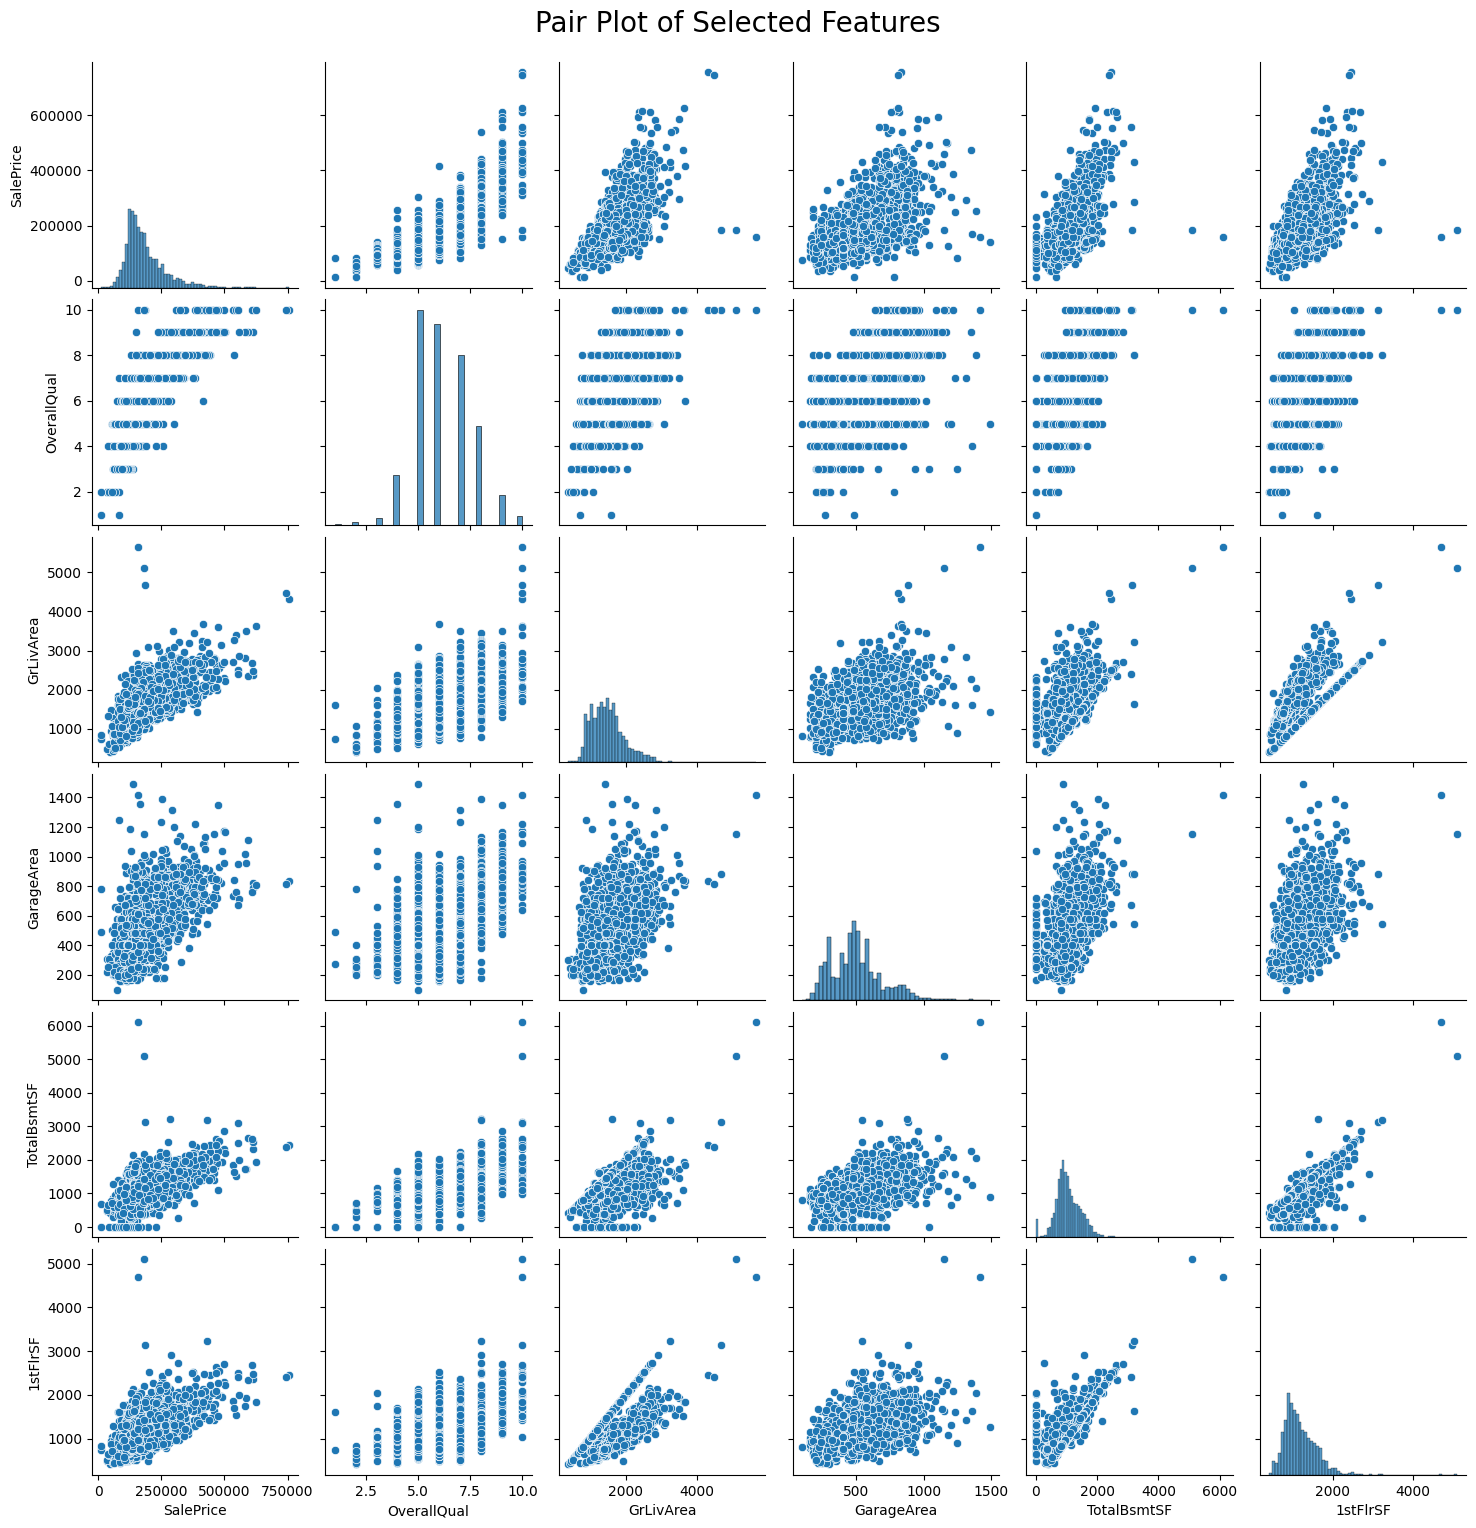

In [14]:
# Pair Plot for Selected Features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(ames_df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=20)
plt.show()

### Summary of Initial EDA

In this initial step, we performed Exploratory Data Analysis (EDA) to understand the structure and characteristics of the Ames Housing dataset.

1. Loading the Dataset: The Ames Housing dataset is loaded into a pandas DataFrame from a CSV file.
2. Initial Examination:
    -   Displaying the first few rows and summary statistics to get an overview of the data.
    -   Listing column names and checking the number of rows and columns to understand the dataset's dimensions.
3. Identifying Missing Values: We identify columns with missing values & their counts to plan imputation strategies.
4. Visualizations:
    -   Plotting the distribution of the target variable 'SalePrice' to understand its range and distribution.
    -   Attempting to create a correlation heatmap to identify strong relationships between features and the    target variable. However, due to categorical variables that need encoding, we cannot display the correlation heatmap yet. We will perform encoding in the preprocessing step and revisit this visualization.
    -   Generating scatter plots of key features against 'SalePrice' to visually inspect relationships.

These initial analyses help in making informed decisions about necessary preprocessing steps, ensuring the dataset is clean and ready for modeling.

Notably, we observed that GarageCars and GarageArea are likely to be highly correlated because the number of cars a garage can hold is directly related to the size of the garage. Keeping both might introduce multi-co-linearity into the model. To avoid this, we may need to drop one of these features in the preprocessing step, after examining the correlation between them. 

In [15]:
# Identify columns with missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64


## II. Data Preparation
Data preparation involves handling missing values, encoding categorical variables, and selecting relevant features for modeling.

1. **Handling Missing Values**: Missing data is imputed using appropriate strategies to ensure completeness of the dataset.

In [ ]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Specifically replace blanks in 'MasVnrArea' with 0
ames_df.replace({'MasVnrArea': 'nan'}, 0, inplace=True)

# Identify columns with missing values
missing_values = ames_df.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Separate numerical and categorical columns with missing values
num_cols_with_missing = ames_df.select_dtypes(include=[np.number]).columns[ames_df.select_dtypes(include=[np.number]).isnull().any()].tolist()
cat_cols_with_missing = ames_df.select_dtypes(exclude=[np.number]).columns[ames_df.select_dtypes(exclude=[np.number]).isnull().any()].tolist()

print("\nNumerical columns with missing values:", num_cols_with_missing)
print("Categorical columns with missing values:", cat_cols_with_missing)

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
ames_df[num_cols_with_missing] = num_imputer.fit_transform(ames_df[num_cols_with_missing])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
ames_df[cat_cols_with_missing] = cat_imputer.fit_transform(ames_df[cat_cols_with_missing])

# Ensure no missing values remain
print("\nColumns with missing values after imputation and their counts:")
print(ames_df.isnull().sum()[ames_df.isnull().sum() > 0])

2. **Encoding Categorical Variables**: Categorical variables are encoded using one-hot encoding to make them suitable for modeling.

In [ ]:
# Encoding categorical variables using one-hot encoding and
# dropping the first level to avoid multicollinearity
ames_df = pd.get_dummies(ames_df, drop_first=True)

3. **Standardizing SalePrice:** The SalePrice is standardized using StandardScaler to normalize its distribution, which can help improve model performance.

In [ ]:
# Standardize 'SalePrice'
saleprice_scaled = StandardScaler().fit_transform(ames_df['SalePrice'].values.reshape(-1, 1))

# Convert scaled SalePrice back to a DataFrame for visualization
ames_df['SalePrice_scaled'] = saleprice_scaled

# Plot the standardized SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice_scaled'], kde=True, color= 'blue')
plt.title('Distribution of Standardized SalePrice')
plt.xlabel('Standardized SalePrice')
plt.ylabel('Frequency')
plt.show()

3. **Removing Outliers:** Using the IQR Method to Identify and Remove Outliers

We remove outliers based on GrLivArea to ensure the dataset is not skewed by extreme values. Specifically, we drop rows where GrLivArea is greater than 4000 square feet.

In [ ]:
# Visualize the distribution of 'GrLivArea'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize 'GrLivArea' with outliers highlighted
plt.figure(figsize=(6, 3))
sns.boxplot(x=ames_df['GrLivArea'])
plt.title('Box Plot of GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

In [ ]:
# Remove outliers based on 'GrLivArea'
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Plot the standardized SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice_scaled'], kde=True, color='blue')
plt.title('Distribution of Standardized SalePrice \n After removing outliers based on GrLivArea')
plt.xlabel('Standardized SalePrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice \n After removing outliers based on GrLivArea')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

- We handled missing values and encoding categorical variables.
- Outliers have been removed.
- SalePrice has been standardized. We will need to reverse this transformation for final reporting.

5. **Feature Selection and Handling Multicollinearity**:

- Identify strong relationships between features and the target variable using correlation analysis.
- Select Relevant features based on their importance and correlation with the target variable, SalePrice.
- Remove highly correlated features to prevent multicollinearity issues.

In [ ]:
# Check correlation between GarageCars and GarageArea
correlation = ames_df[['GarageCars', 'GarageArea']].corr()
print("Correlation between GarageCars and GarageArea:")
print(correlation)

# Based on the correlation, decide whether to drop one of the features
if abs(correlation.loc['GarageCars', 'GarageArea']) > 0.8:
    print("Drop 'GarageCars' due to high correlation with 'GarageArea'")

else:
    print("Keeping both 'GarageCars' and 'GarageArea'")
    

Since the correlation between GarageCars and GarageArea is indeed high (0.845),
it makes sense to drop GarageCars to avoid multicollinearity.

In [ ]:
# Drop GarageCars if it exists
if 'GarageCars' in ames_df.columns:
    ames_df.drop(columns=['GarageCars'], inplace=True)

In [ ]:
# Standardize 'SalePrice'
saleprice_scaled = StandardScaler().fit_transform(ames_df['SalePrice'].values.reshape(-1, 1))
plt.show()

# Remove outliers based on 'GrLivArea'
ames_df.sort_values(by='GrLivArea', ascending=False)[:2]
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Plot scatter plot for 'TotalBsmtSF' vs 'SalePrice'
var = 'TotalBsmtSF'
data = pd.concat([ames_df['SalePrice'], ames_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', color = 'green', ylim=(0, 800000))
plt.title('Scatter plot of TotalBsmtSF vs SalePrice')
plt.show()

In [ ]:
# Display the first few rows of the Ames dataset
print("First few rows of the Ames dataset:")
print(ames_df.head())

# Display summary statistics of the Ames dataset
print("\nSummary statistics of the Ames dataset:")
print(ames_df.describe())

# List the column names of the Ames dataset
print("\nColumn names of the Ames dataset:")
print(ames_df.columns.tolist())

# Split the data into training and testing sets
train_df, test_df = train_test_split(ames_df, test_size=0.2, random_state=42)

# Display the first few rows of the training set
print("\nFirst few rows of the training set:")
print(train_df.head())

# Display the first few rows of the testing set
print("\nFirst few rows of the testing set:")
print(test_df.head())

In [ ]:
train_df.describe()

In [ ]:
# Get the number of rows and columns in the Ames dataset
num_rows, num_columns = ames_df.shape

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

In [ ]:
# Print the column names of the Ames dataset
print("Column names of the Ames dataset:")
print(ames_df.columns.tolist())

In [ ]:
# Print the column names of the Ames dataset in groups of 5
columns = ames_df.columns.tolist()
print("Column names of the Ames dataset:")

for i in range(0, len(columns), 10):
    print(columns[i:i+10])

#### 2. Basic Statistical Analysis

In [ ]:
# Histograms for key features
train_df.hist(figsize=(20, 20), color = 'blue')  # create histograms for all numerical features in the dataset
plt.show()                       # display the plots

In [ ]:
# Bar plot of overall quality
plt.figure(figsize=(10, 6))  # set the figure size
sns.countplot(x='OverallQual', data=train_df, color = 'blue')  # create a count plot for the OverallQual column
plt.title('Overall Quality Distribution')  # add a title to the plot
plt.show()  # display the plot

In [ ]:
# Distribution of sale prices
plt.figure(figsize=(10, 6))  # set the figure size
sns.histplot(train_df['SalePrice'], bins=50, kde=True, color ='darkorange')  # create a histogram with a kernel density estimate for the SalePrice column
plt.title('Distribution of Sale Prices')  # add a title to the plot
plt.show()  # display the plot

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Scatter plot of square footage vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, color = 'blue')  # Create a scatter plot for square footage (GrLivArea) vs. house price (SalePrice)
plt.title('Square Footage vs. SalePrice')  # Add a title to the plot
plt.show()  # Display the plot

# Scatter plot of age of home vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_df, color = 'blue')  # Create a scatter plot for the age of home (YearBuilt) vs. house price (SalePrice)
plt.title('Age of Home vs. SalePrice')  # Add a title to the plot
plt.show()  # Display the plot

# Boxplot of neighborhood vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, hue='Neighborhood', palette = 'Blues')  # Create a box plot for neighborhood (Neighborhood) vs. house price (SalePrice)
plt.title('Neighborhood vs. SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

# Boxplot of neighborhood vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, hue='OverallQual', palette = 'Blues')  # Create a box plot 
plt.title('Overall Quality vs SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

# Boxplot of year built vs. sale price
plt.figure(figsize=(18, 4))  # Set the figure size
sns.boxplot(x='YearBuilt', y='SalePrice', data=train_df, hue='YearBuilt', palette = 'Blues')  # Create a box plot for year built (YearBuilt) vs. house price (SalePrice)
plt.title('YearBuilt vs. SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

In [ ]:
#scatterplot
sns.set_theme(style="ticks")
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2.5, hue = 'SalePrice')
plt.show()

In [ ]:
# Select only categorical columns
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplot grid
n_cols = 6
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

# Plot count plots for categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.countplot(x=train_df[feature], ax=axes[i], hue=train_df[feature], palette="coolwarm", dodge=False, legend=False)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [ ]:
# Plot bar plots for categorical features against mean SalePrice
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.barplot(x=train_df[feature], y=train_df['SalePrice'], ax=axes[i], errorbar=None, hue=train_df[feature], palette="viridis", dodge=False, legend=False)
    axes[i].set_title(f'{feature} vs Mean SalePrice')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [ ]:
# Standardize 'SalePrice'
saleprice_scaled = StandardScaler().fit_transform(ames_df['SalePrice'].values.reshape(-1, 1))

# Remove outliers based on 'GrLivArea'
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Prepare features and target variable
X = ames_df[['GrLivArea', 'TotalBsmtSF']]
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Baseline Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Regression Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Print the regression coefficients
print(f"Regression Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")

In [ ]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Select key features for correlation analysis
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

# Filter the correlation matrix for the key features
key_correlation_matrix = correlation_matrix.loc[key_features, key_features]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(key_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()


In [ ]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display the first few rows of the correlation matrix to verify it's calculated correctly
print("Correlation Matrix:")
correlation_matrix.head()

In [ ]:
# Display the correlation matrix above, as a heatmap
# Function to adjust tick labels
def adjust_tick_labels(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for tick in ax.get_yticklabels():
        tick.set_rotation(0)

# Example usage in a heatmap with the selected correlation matrix
plt.figure(figsize=(20, 20))

# Plot the heatmap with adjusted annotation font size
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Matrix of All Numerical Features')
plt.show()

- Since the Correlation Matrix is symmetrical, removing the top half above the diagonal. 

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)   # k=1 to exclude the diagonal from masking

# Plot the heatmap with the mask
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Matrix of All Numerical Features (Lower Triangle) with Mask')
plt.show()

### 4. Data Processing and Feature Engineering
#### Feature Selection Using Random Forest
**1. One-Hot Encoding**

In [ ]:
# Convert boolean columns to integer
bool_cols = train_df.select_dtypes(include=[bool]).columns.tolist()
train_df[bool_cols] = train_df[bool_cols].astype(int)

# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Update numerical columns after one-hot encoding
numerical_cols = train_df.select_dtypes(include=[np.number]).columns

# Standardize numerical features
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

**2. Model Training and Evaluation - Random Forest**

In [ ]:
# Separate the target variable and features
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Evaluate feature importance
feature_importances = rf_model.feature_importances_

# Get feature names
all_features = X.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(40))
plt.title('Top 40 Feature Importances in Random Forest Regressor')
plt.show()

When the preprocessing pipeline applies transformations like one-hot encoding, it generates new feature names based on the original categorical variables.
(i.e. Foundation -> Foundation_CBlock, or RoofStyle -> RoofStyle_Hip)
These new names include the original variable names with appended values, creating a more detailed representation.

To address this and create pair plots effectively, we need to:

- Identify the original feature names from the transformed dataset.
- Map the new feature names back to the original feature names.
- Use the top 30 features (or their respective original names) for the pair plot.

In [ ]:
# Define the number of top features to select
num_features = 30  # change this number as needed to select the top X features

# Hyperparameter Tuning Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define a more efficient parameter grid for quicker optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Define the RandomizedSearchCV with fewer iterations
rf_random = RandomizedSearchCV( estimator=RandomForestRegressor(),
                                param_distributions=param_grid,
                                n_iter=10, cv=3, verbose=2,
                                random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_

# Train the final model with the best parameters
rf_optimized = RandomForestRegressor(**best_params)
rf_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized = rf_optimized.predict(X_test)

# Evaluate the model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Display the results
print("Optimized Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Best Parameters: {best_params}")

# Evaluate feature importance
feature_importances = rf_optimized.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top X features
top_X_features = feature_importances_df.head(num_features)['Feature'].tolist()
print(f"Top {num_features} Features:")
# print(top_X_features)
top_X_features

In [ ]:
# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(num_features))
plt.title(f'Top {num_features} Feature Importances in Optimized Random Forest Regressor')
plt.show()

# Map the new feature names back to the original feature names
original_features = []
for feature in top_X_features:
    if '_' in feature:
        original_features.append(feature.split('_')[0])
    else:
        original_features.append(feature)

# Remove duplicates while preserving order
original_features = list(dict.fromkeys(original_features))

# Check if the original features exist in the dataframe and filter
filtered_features = [feature for feature in original_features if feature in train_df.columns]

# Add SalePrice to the list of top original features
filtered_features.append('SalePrice')

print("Filtered Top Original Features for Pair Plot:")
print(filtered_features)

In [ ]:
# Pair plot for the filtered top original features
#sns.set_theme(style="ticks")
#sns.pairplot(train_df[filtered_features], height=2.5)
#plt.show()

In [ ]:
# Select top 40 features for further analysis
top_40_features = feature_importances_df.head(40)['Feature'].tolist()
# Violin plot for the top 10 features
plt.figure(figsize=(12, 4))
sns.violinplot(data=train_df[top_40_features], inner="quartile")
plt.title('Violin Plot for Top 40 Features')
plt.xticks(rotation=90)
plt.show()

# Divide top 40 features into groups of 10 for violin plots
top_20_features = top_40_features[:20]
next_20_features = top_40_features[20:40]

# Violin plot for the top 10 features
plt.figure(figsize=(6, 4))
sns.violinplot(data=train_df[top_20_features], inner="quartile")
plt.title('Violin Plot for Top 20 Features')
plt.xticks(rotation=90)
plt.show()

# Violin plot for the next 10 features
plt.figure(figsize=(6, 4))
sns.violinplot(data=train_df[next_20_features], inner="quartile")
plt.title('Violin Plot for Next 20 Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 2D Histogram for combinations of the top 40 features
for i in range(len(top_40_features) - 1):
    plt.figure(figsize=(6, 4))
    feature1 = train_df[top_40_features[i]]
    feature2 = train_df[top_40_features[i + 1]]

    # Check if both features are numeric
    if pd.api.types.is_numeric_dtype(feature1) and pd.api.types.is_numeric_dtype(feature2):
        # Drop any rows with missing values for the selected features and synchronize their indices
        combined = pd.concat([feature1, feature2], axis=1).dropna()
        feature1_clean = combined.iloc[:, 0]
        feature2_clean = combined.iloc[:, 1]
        
        plt.hist2d(feature1_clean, feature2_clean, bins=40, cmap='viridis')
        plt.colorbar()
        plt.title(f'2D Histogram of {top_40_features[i]} and {top_40_features[i + 1]}')
        plt.xlabel(top_40_features[i])
        plt.ylabel(top_40_features[i + 1])
        plt.show()
    else:
        print(f"Skipping features {top_40_features[i]} and {top_40_features[i + 1]} as they are not numeric.")


In [ ]:
# Annotated heatmap for top 40 features
plt.figure(figsize=(16, 12))
correlation_matrix_top_40 = train_df[top_40_features].corr()
sns.heatmap(correlation_matrix_top_40, annot=False, cmap='coolwarm')
plt.title('Heatmap for Top 40 Features')
plt.show()

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# Curve with error bands for one of the top features
feature = top_40_features[4]
X = sm.add_constant(train_df[feature])
model = sm.OLS(train_df['SalePrice'], X).fit()
predictions = model.predict(X)

plt.figure(figsize=(8, 4))
plt.plot(train_df[feature], train_df['SalePrice'], 'o', label='data', color='turquoise')
plt.plot(train_df[feature], predictions, 'r--.', label='OLS fit')
# Use iloc for positional indexing to avoid the warning
plt.fill_between(train_df[feature], predictions - 1.96 * model.bse.iloc[1], predictions + 1.96 * model.bse.iloc[1], color='red', alpha=0.2)
plt.xlabel(feature)
plt.ylabel('SalePrice')
plt.title(f'OLS Fit with Error Bands for {feature}')
plt.legend(loc='best')
plt.show()


In [ ]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if not missing_columns.empty:
    print("Columns with missing values and their counts:")
    print(missing_columns)
else:
    print("No missing values in the dataset.")


#### Further Optimizing Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## Commenting these out because this block is run in the previous cells - but if ran separately, uncomment this block
## Convert boolean columns to integer
# bool_cols = train_df.select_dtypes(include=[bool]).columns.tolist()
# train_df[bool_cols] = train_df[bool_cols].astype(int)

## Handle missing values
# imputer = SimpleImputer(strategy='median')
# train_df[train_df.columns] = imputer.fit_transform(train_df)

## One-hot encode categorical variables
# train_df = pd.get_dummies(train_df, drop_first=True)

## Update numerical columns after one-hot encoding
# numerical_cols = train_df.select_dtypes(include=[np.number]).columns

## Standardize numerical features
# scaler = StandardScaler()
# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

## Separate the target variable and features
# X = train_df.drop('SalePrice', axis=1)
# y = train_df['SalePrice']


# Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define the number of top features to select
num_features = 30  # change this number as needed to select the top X features

# Hyperparameter Tuning Using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Define the RandomizedSearchCV with cross-validation
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                               param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=2,
                               random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_

# Train the final model with the best parameters
rf_optimized = RandomForestRegressor(**best_params)
rf_optimized.fit(X_train, y_train)

# Cross-validation for better performance estimation
cv_scores = cross_val_score(rf_optimized, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-np.mean(cv_scores)}")

# Make predictions
y_pred_optimized = rf_optimized.predict(X_test)

# Evaluate the model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Display the results
print("Optimized Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Best Parameters: {best_params}")

# Evaluate feature importance
feature_importances = rf_optimized.feature_importances_

# Since we used polynomial features, we need to get the feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out(input_features=X.columns)

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Get the original feature names
original_feature_names = feature_importances_df.head(num_features)['Feature'].tolist()

# Print the top X features with their original names
print(f"Top {num_features} Features with Original Names:")
print(original_feature_names)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(40))
plt.title('Top 40 Feature Importances in Random Forest Regressor')
plt.show()

#### Analysis of Polynomial Features with Random Forest Regressor

 -  In an attempt to improve the performance of our Random Forest Regressor for predicting house prices, we incorporated polynomial features into the dataset. Polynomial features can capture      interaction effects between variables, potentially improving the model's predictive power. However, this comes at the cost of increased computational complexity.

**Experiment**

**1. Data Preprocessing:**
-   Converted boolean columns to integers.
-   Handled missing values using the median strategy.
-   One-hot encoded categorical variables.
-   Standardized numerical features.

**2. Polynomial Features:**

    Added polynomial features (degree=2, interaction-only) to the dataset to capture interactions between variables.

**3. Model Training:**
-   Used RandomizedSearchCV to optimize the hyperparameters of the Random Forest Regressor.
-   Evaluated the model using cross-validation to ensure robust performance metrics.

**Results**

    Despite adding polynomial features, the performance of the Random Forest Regressor did not improve significantly.

    The optimized model achieved the following metrics:
        Cross-validated MAE: 0.2046
        Optimized MAE: 0.1769
        Optimized MSE: 0.0629
        Runtime: 13m43s
        Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

**Conclusion**

    The addition of polynomial features did not lead to a noticeable improvement in the performance of the Random Forest Regressor. This suggests that the model might not benefit significantly from the interaction terms or that the current feature engineering approach needs further refinement.

**Next Steps**

- While polynomial features did not enhance the Random Forest model's performance, there are several avenues for further improvement:

**Refine Feature Engineering:**

- Explore different polynomial degrees or additional feature transformations.

**Alternative Models:**

- Investigate other models such as Gradient Boosting, XGBoost, or LightGBM, which may better capture the complexities of the dataset.

**Model Stacking:**

- Combine multiple models to leverage their strengths and potentially improve overall performance.

# Ridge Regression

Ridge Regression is used to address multicollinearity and overfitting by applying a penalty value to large coefficents. We can now apply a Ridge Regression to the Ames data set since it has been preprocessed, split into a test and train and standardized to fit our various models consistently. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Remove outliers based on 'GrLivArea'
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)

# Prepare features and target variable
X = ames_df[['GrLivArea', 'TotalBsmtSF']]
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardize the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the parameter grid for alpha with a finer range
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Initialize and train the Ridge Regression model with GridSearchCV
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Measure the time taken to perform GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
grid_search_runtime = end_time - start_time

# Get the best parameters and the best score
ridge_best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the Ridge Regression model with the best alpha
best_ridge_model = Ridge(**ridge_best_params)

# Measure the time taken to train the model with the best parameters
start_time = time.time()
best_ridge_model.fit(X_train, y_train)
end_time = time.time()
training_runtime = (end_time - start_time) * 1000 

# Make predictions with the best model
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

# Evaluate the model with the best alpha
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Best parameters: {ridge_best_params}")
print(f"Best cross-validation R-squared: {best_score}")
print("Ridge Regression Results with Best Parameters:")
print(f"Training Mean Absolute Error (MAE): ${train_mae:.2f}")
print(f"Testing Mean Absolute Error (MAE): ${test_mae:.2f}")
print(f"Time taken for GridSearchCV: {grid_search_runtime:.2f} milliseconds")
print(f"Time taken to train the best model: {training_runtime:.2f} milliseconds")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Regression Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice with Ridge Regression')
plt.legend()
plt.show()

# Print the regression coefficients
print(f"Regression Coefficients: {best_ridge_model.coef_}")
print(f"Intercept: {best_ridge_model.intercept_}")

#### **XGBoost Model**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Define the RandomizedSearchCV with cross-validation
xgb_random = RandomizedSearchCV(estimator=XGBRegressor(),
                                param_distributions=param_grid,
                                n_iter=100, cv=5, verbose=2,
                                random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
xgb_random.fit(X_train, y_train)

# Get the best parameters
best_params = xgb_random.best_params_

# Train the final model with the best parameters
xgb_optimized = XGBRegressor(**best_params)
xgb_optimized.fit(X_train, y_train)

# Cross-validation for better performance estimation
cv_scores = cross_val_score(xgb_optimized, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-np.mean(cv_scores)}")

# Make predictions
y_pred_optimized = xgb_optimized.predict(X_test)

# Evaluate the model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Display the results
print("Optimized XGBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Best Parameters: {best_params}")

# Evaluate feature importance
feature_importances = xgb_optimized.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top X features with their original names
top_X_features = feature_importances_df.head(num_features)['Feature'].tolist()
print(f"Top {num_features} Features with Original Names:")
print(top_X_features)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(40))
plt.title('Top 40 Feature Importances in XGBoost Regressor')
plt.show()

In [ ]:
# Re-calculate the performance metrics on the original scale
# Transform back the log predictions and the actual values
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

# Evaluate the model on the original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)

# Print results
print(f"Baseline Simple Linear Regression Model (Original Scale):")
print(f"Mean Absolute Error (MAE): {mae_original}")
print(f"Mean Squared Error (MSE): {mse_original}")

# Plot actual vs predicted on the original scale
plt.figure(figsize=(8, 4))
plt.scatter(y_test_original, y_pred_original, color='turquoise')  # Replace custom_palette with a color
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Original Scale)')
plt.show()

#### Support Vector Regression (SVR)

In [ ]:
X = ames_df[filtered_features]
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the SVR model
svr_model = SVR()

# Define parameter grid
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

# Perform grid search
svr_search = GridSearchCV(svr_model, svr_params, cv=5)
svr_search.fit(X_train, y_train)

# Best parameters
best_svr_params = svr_search.best_params_

# Make predictions
svr_pred = svr_search.predict(X_test)

# Evaluate the model
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

print(f"SVR Performance:\nBest Parameters: {best_svr_params}\nMean Absolute Error (MAE): {svr_mae}\nMean Squared Error (MSE): {svr_mse}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='blue', label='SVR Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (SVR)')
plt.legend()
plt.show()

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform randomized search
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)

# Best parameters
best_xgb_params = xgb_search.best_params_

# Make predictions
xgb_pred = xgb_search.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f"XGBoost Performance:\nBest Parameters: {best_xgb_params}\nMean Absolute Error (MAE): {xgb_mae}\nMean Squared Error (MSE): {xgb_mse}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='XGBoost Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (XGBoost)')
plt.legend()
plt.show()


#### Model Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Use the best hyperparameters found previously
best_ridge_params = {'alpha': 100}  # Update with the actual best parameter for optimization 
best_lasso_params = {'alpha': 0.001}  # Update with the actual best parameter for optimization 
best_elasticnet_params = {'alpha': 0.01, 'l1_ratio': 0.1}  # Update with the actual best parameters

# Define individual models with the best hyperparameters
ridge_model = Ridge(alpha=best_ridge_params['alpha'])
lasso_model = Lasso(alpha=best_lasso_params['alpha'])
elasticnet_model = ElasticNet(alpha=best_elasticnet_params['alpha'], l1_ratio=best_elasticnet_params['l1_ratio'])

# Define the ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('ridge', ridge_model),
    ('lasso', lasso_model),
    ('elasticnet', elasticnet_model),
    ('svr', svr_search.best_estimator_),
    ('xgb', xgb_search.best_estimator_)
])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the model
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_mse = mean_squared_error(y_test, ensemble_pred)

print(f"Ensemble Model Performance:\nMean Absolute Error (MAE): {ensemble_mae}\nMean Squared Error (MSE): {ensemble_mse}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ensemble_pred, color='blue', label='Ensemble Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Ensemble Model)')
plt.legend()
plt.show()

#### Artificial Neural Network (ANN)